환경

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

데이터 불러오기

In [3]:
train = pd.read_csv('data/train.csv')
val = pd.read_csv('data/val.csv')
test = pd.read_csv('data/test.csv')

In [4]:
display(train.head(), 
        val.head(), 
        test.head())

ID        V1        V2        V3        V4        V5        V6        V7  \
0   3 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
1   4 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
2   6 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
3   8 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
4   9 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
1  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
2  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
3 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
4  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   

        V26       V27       V28       V29       V30  
0 -0.139097 -0.055353 -0.059752  4.983721 -0.994972  
1 -0.221929  0.062723  0.061458  1.418291 -0.994972  
2  0.105915  0.253844  0.081080 -0.256131 -0.994960  
3 -0.051634 -1.206921 -1.085339  0.262698 -0.994901  
4 -0.384157  0.011747  0.142404  0.994900 -0.994901  

[5 rows x 31 columns]

ID        V1        V2        V3        V4        V5        V6        V7  \
0  10 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   
1  22  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038  0.107712   
2  63  1.145524  0.575068  0.194008  2.598192 -0.092210 -1.044430  0.531588   
3  69  0.927060 -0.323684  0.387585  0.544474  0.246787  1.650358 -0.427576   
4  83 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575  2.065426   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.069539 -0.736727  ... -0.633753 -0.120794 -0.385050 -0.069733  0.094199   
1  0.521502 -1.191311  ...  0.402492 -0.048508 -1.371866  0.390814  0.199964   
2 -0.241888 -0.896287  ... -0.119703 -0.076510  0.691320  0.633984  0.048741   
3  0.615371  0.226278  ...  0.079359  0.096632 -0.992569  0.085096  0.377447   
4 -1.829347  4.009259  ... -0.181268 -0.163747  0.515821  0.136318  0.460054   

        V27       V28       V29       V30  Class  
0  0.246219  0.083076 -0.255991 -0.994878      0  
1  0.016371 -0.014605  0.168937 -0.994784      0  
2 -0.053192  0.016251  0.169496 -0.994502      0  
3  0.036096 -0.005960  0.331307 -0.994467      0  
4 -0.251259 -1.105751 -0.287012 -0.994373      0  

[5 rows x 32 columns]

ID        V1        V2        V3        V4        V5        V6  \
0  AAAA0x1 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1  AAAA0x2  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  AAAA0x5 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
3  AAAA0x7  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
4  AAAA0xc  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
3 -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
4  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   

        V25       V26       V27       V28       V29       V30  
0  0.128539 -0.189115  0.133558 -0.021053  1.783274 -0.994983  
1  0.167170  0.125895 -0.008983  0.014724 -0.269825 -0.994983  
2 -0.206010  0.502292  0.219422  0.215153  0.670579 -0.994960  
3  0.750137 -0.257237  0.034507  0.005168 -0.237686 -0.994937  
4 -0.767315 -0.492208  0.042472 -0.054337 -0.167819 -0.994866  

[5 rows x 31 columns]

결측치 확인

In [5]:
print(train.isnull().sum().sum(), val.isnull().sum().sum(), test.isnull().sum().sum())

0 0 0


Feature들의 특성 파악

In [6]:
condition = (val['Class']==0)
val_copy = val.copy()
val_copy.loc[condition, 'Class'] = 'Normal'
val_copy.loc[~condition, 'Class'] = 'Anomaly'
val_copy['Class'].value_counts()

Normal     28432
Anomaly       30
Name: Class, dtype: int64

In [7]:
val_copy.head()

ID        V1        V2        V3        V4        V5        V6        V7  \
0  10 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   
1  22  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038  0.107712   
2  63  1.145524  0.575068  0.194008  2.598192 -0.092210 -1.044430  0.531588   
3  69  0.927060 -0.323684  0.387585  0.544474  0.246787  1.650358 -0.427576   
4  83 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575  2.065426   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.069539 -0.736727  ... -0.633753 -0.120794 -0.385050 -0.069733  0.094199   
1  0.521502 -1.191311  ...  0.402492 -0.048508 -1.371866  0.390814  0.199964   
2 -0.241888 -0.896287  ... -0.119703 -0.076510  0.691320  0.633984  0.048741   
3  0.615371  0.226278  ...  0.079359  0.096632 -0.992569  0.085096  0.377447   
4 -1.829347  4.009259  ... -0.181268 -0.163747  0.515821  0.136318  0.460054   

        V27       V28       V29       V30   Class  
0  0.246219  0.083076 -0.255991 -0.994878  Normal  
1  0.016371 -0.014605  0.168937 -0.994784  Normal  
2 -0.053192  0.016251  0.169496 -0.994502  Normal  
3  0.036096 -0.005960  0.331307 -0.994467  Normal  
4 -0.251259 -1.105751 -0.287012 -0.994373  Normal  

[5 rows x 32 columns]

In [8]:
feature_cols = val.columns.drop(['ID', 'Class'])
label_col = 'Class'

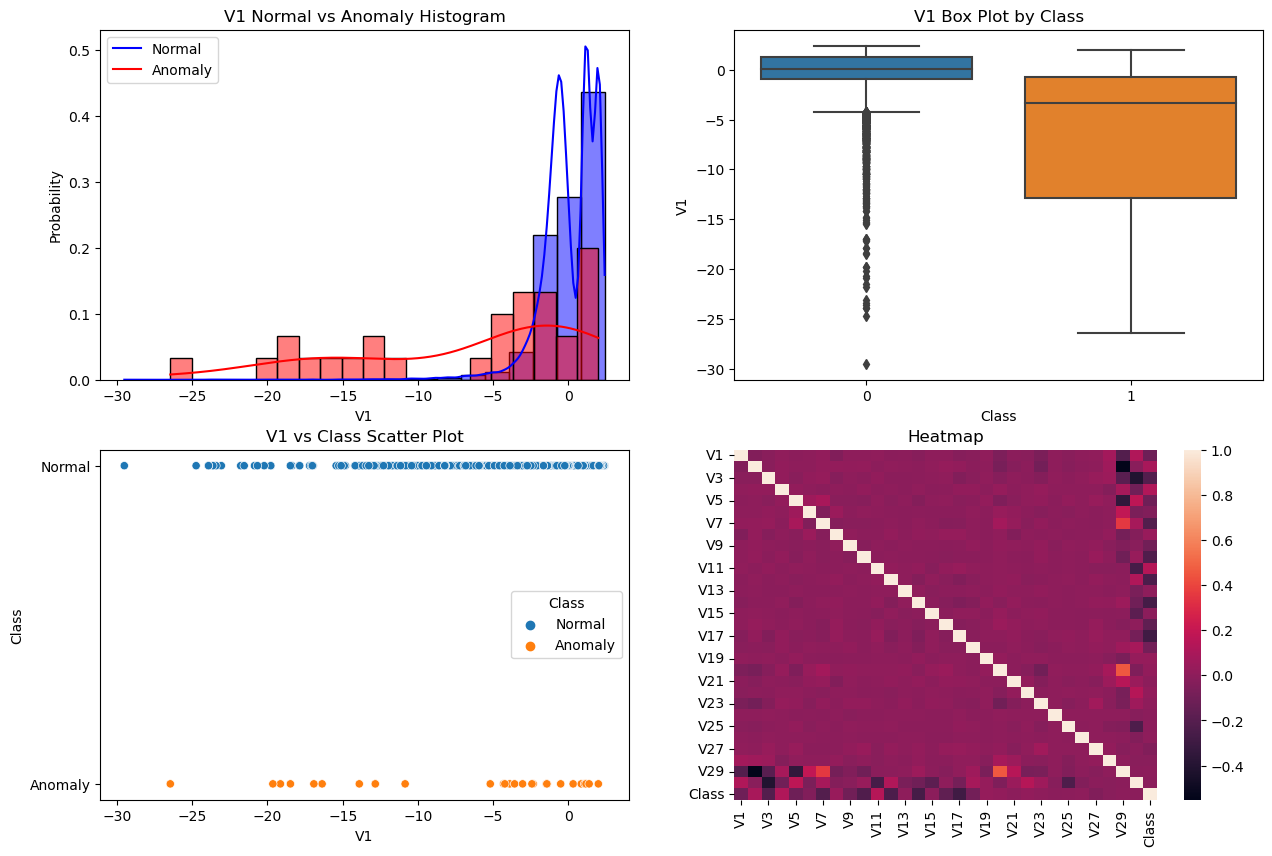

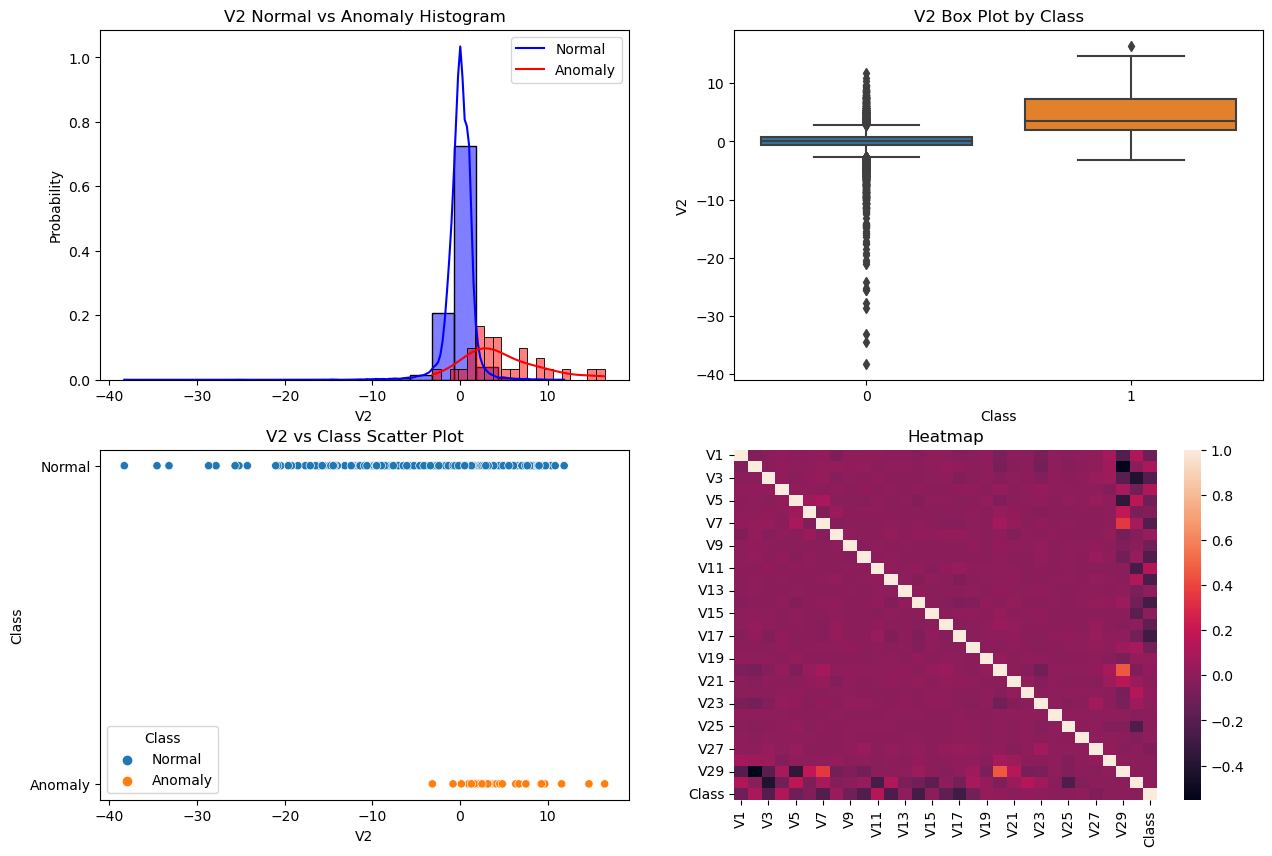

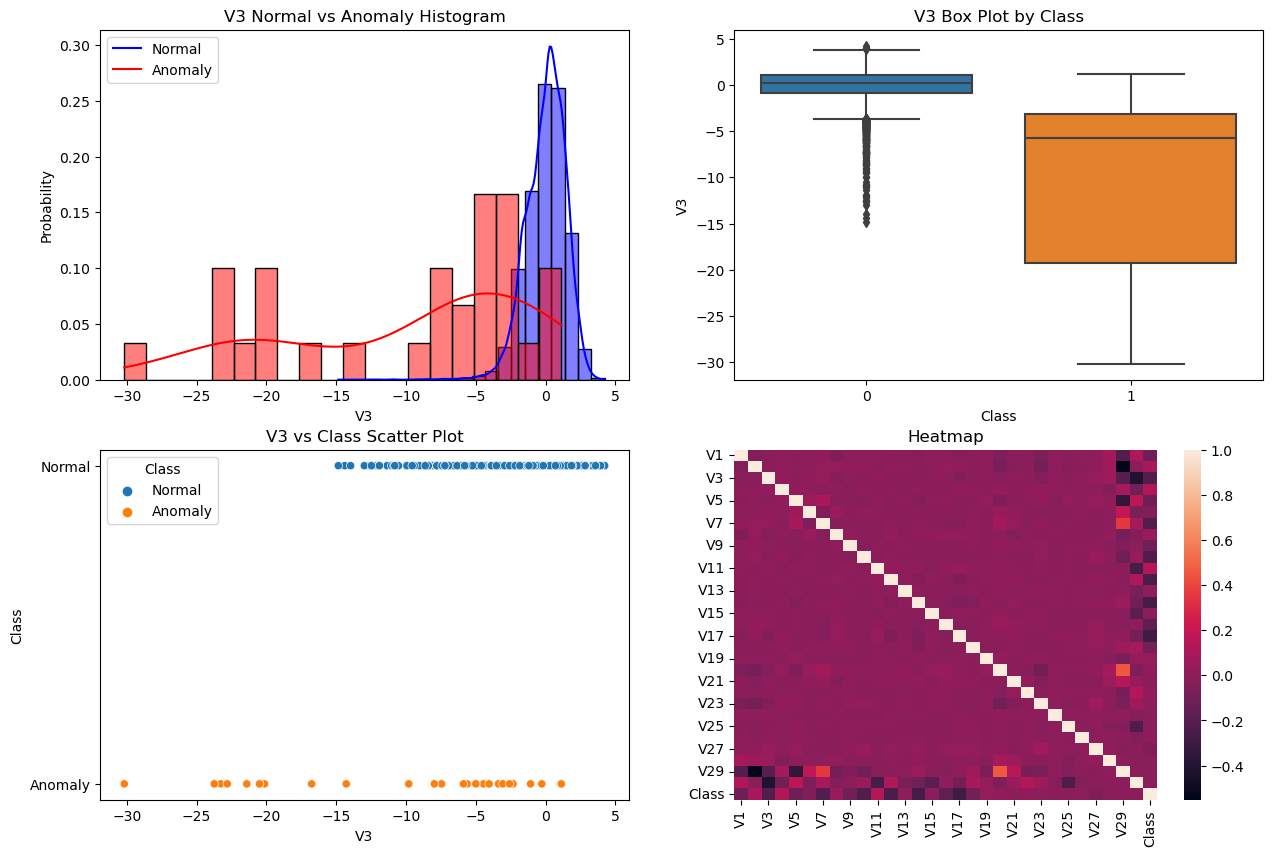

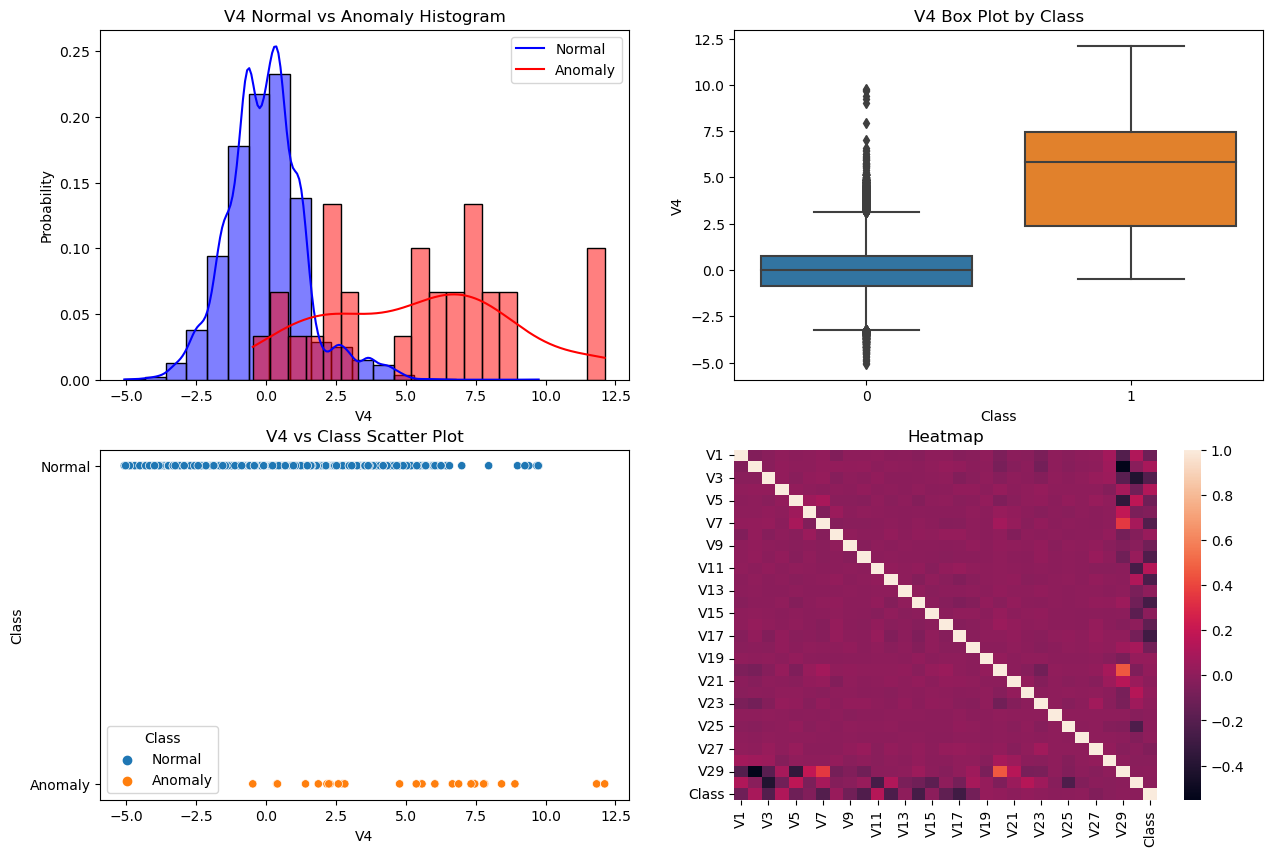

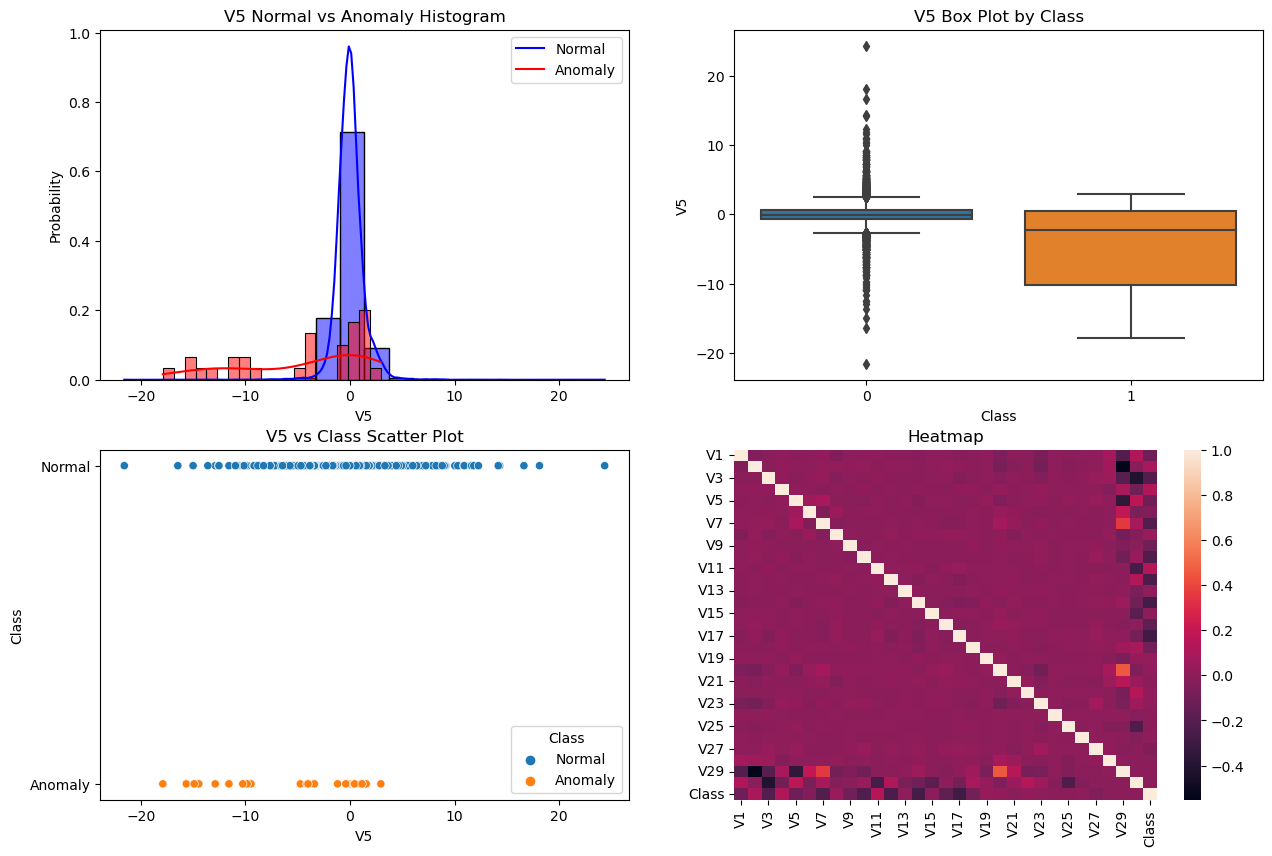

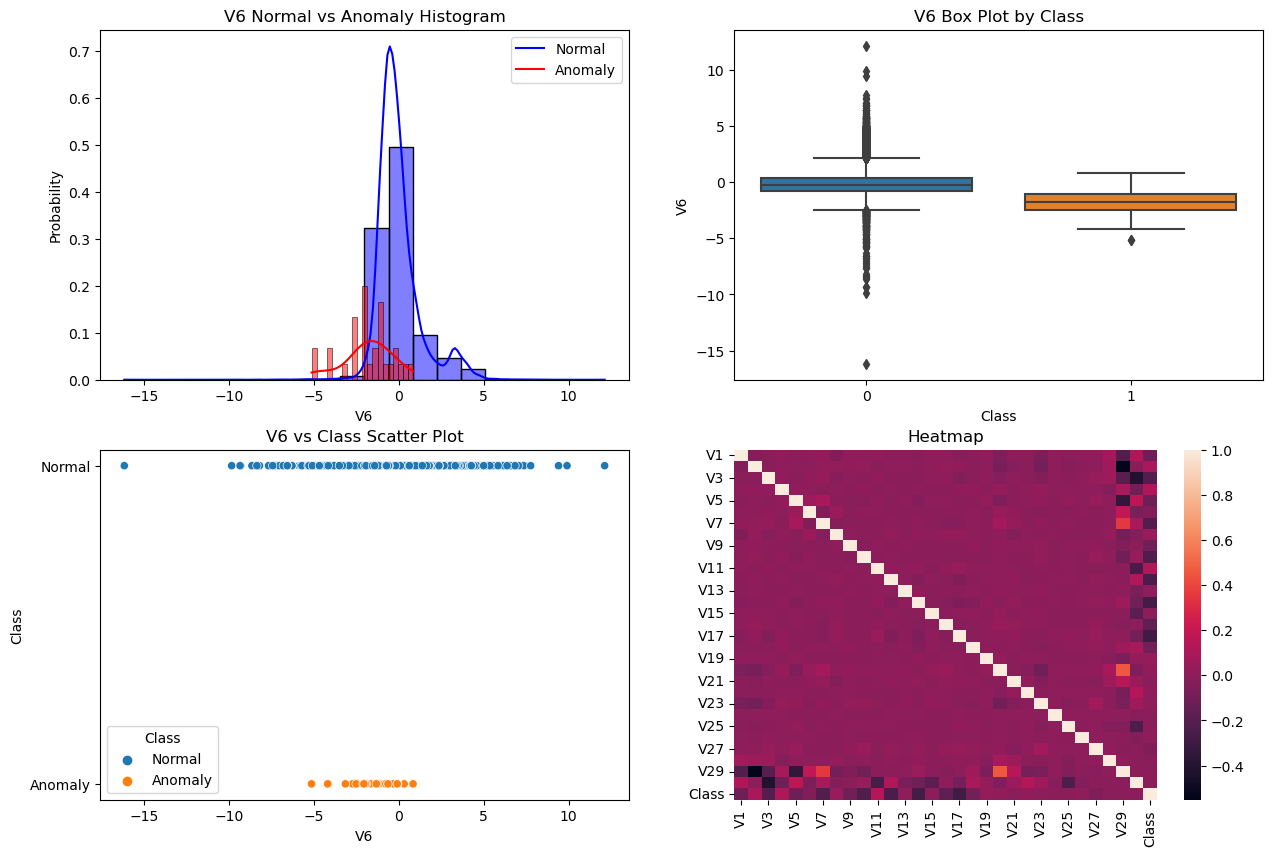

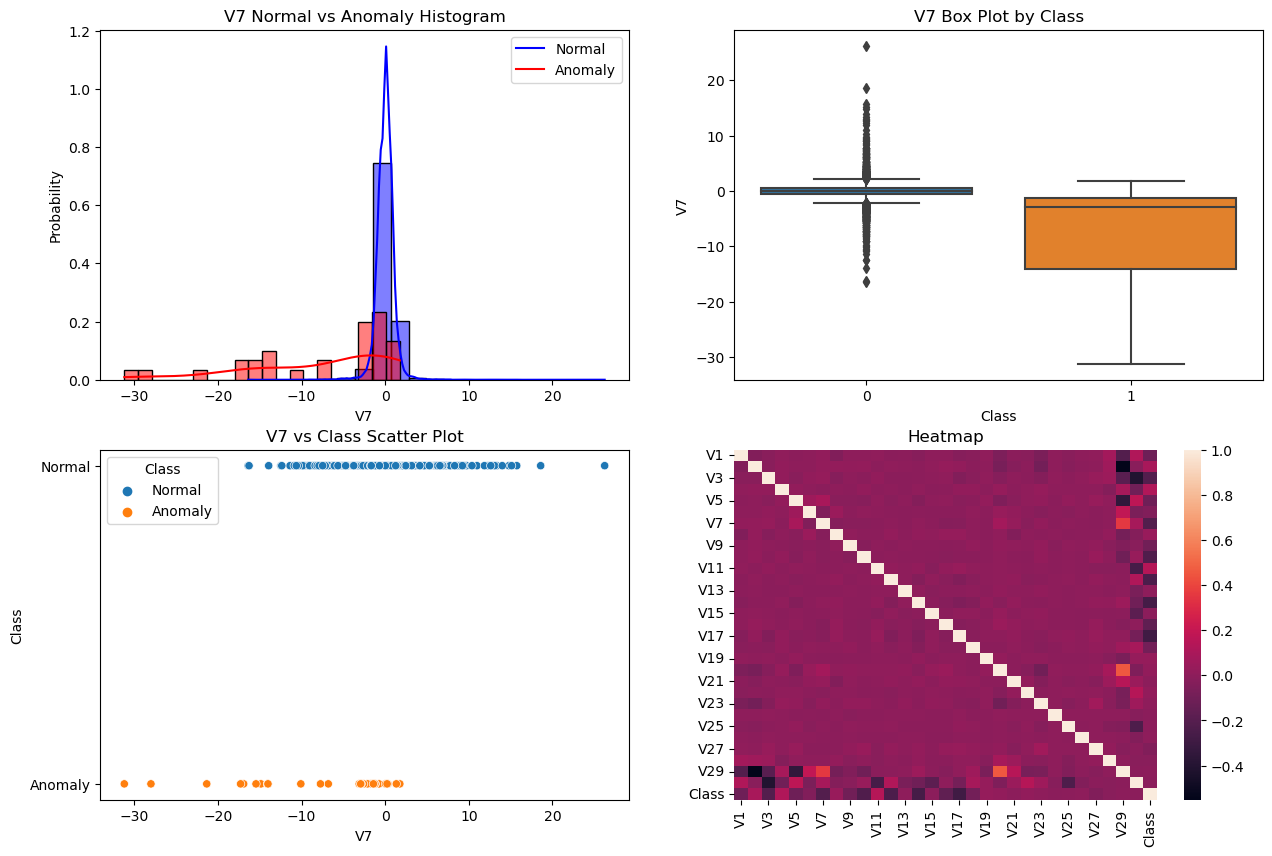

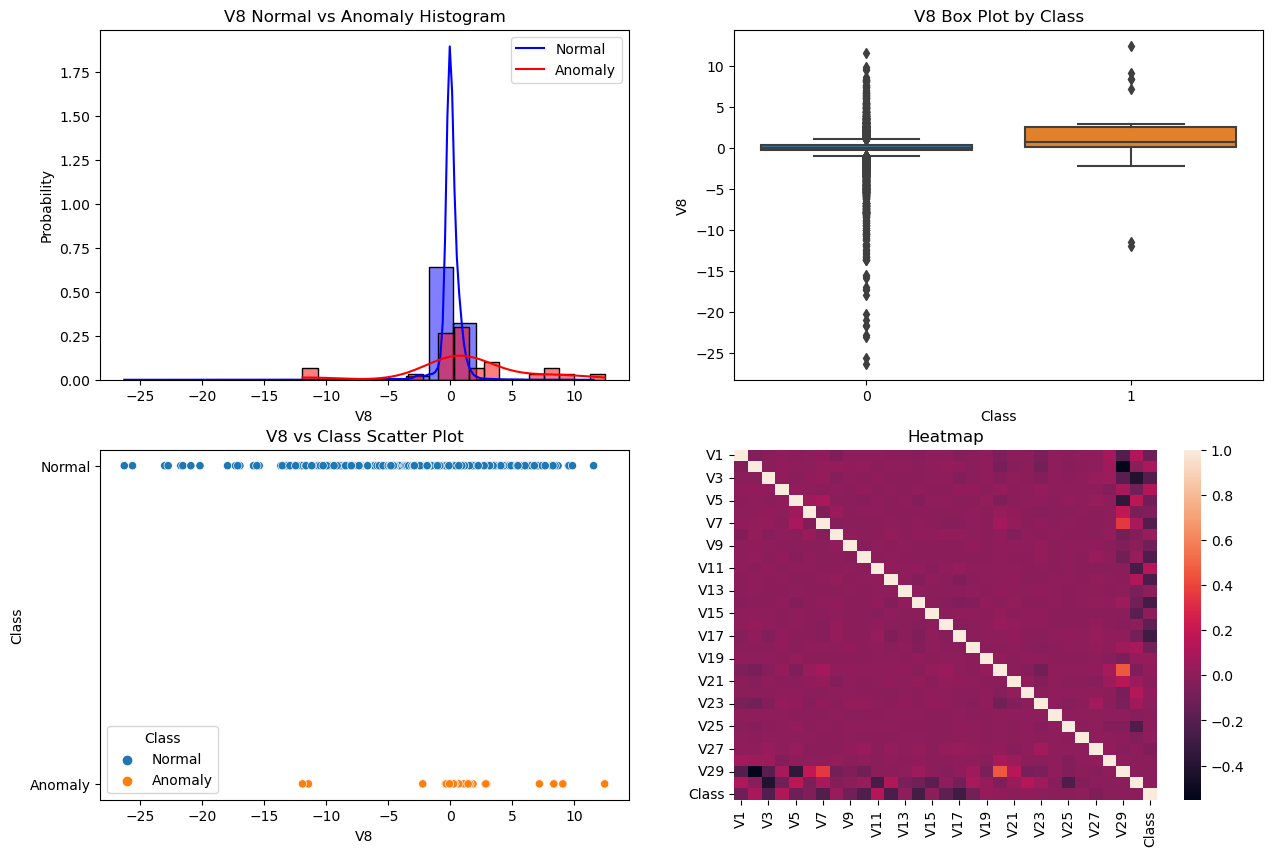

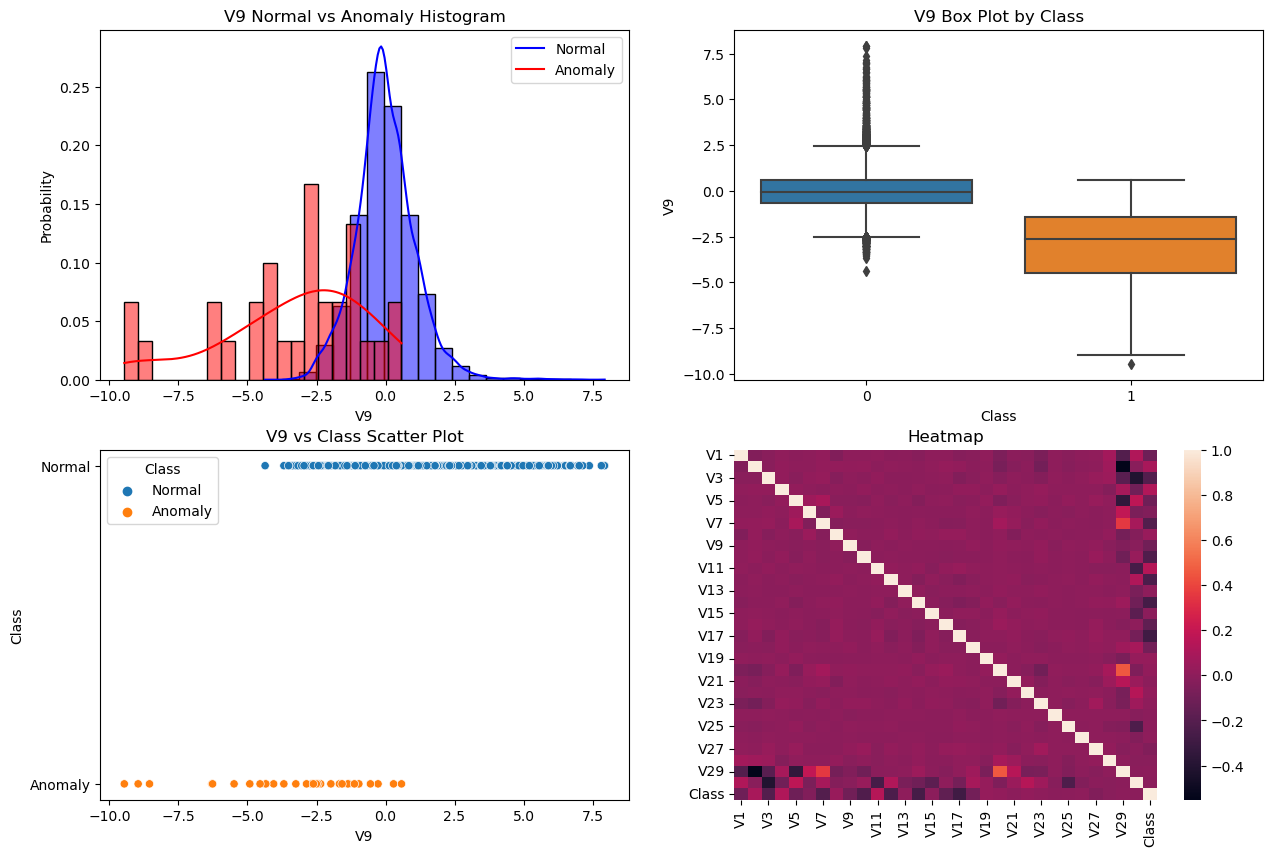

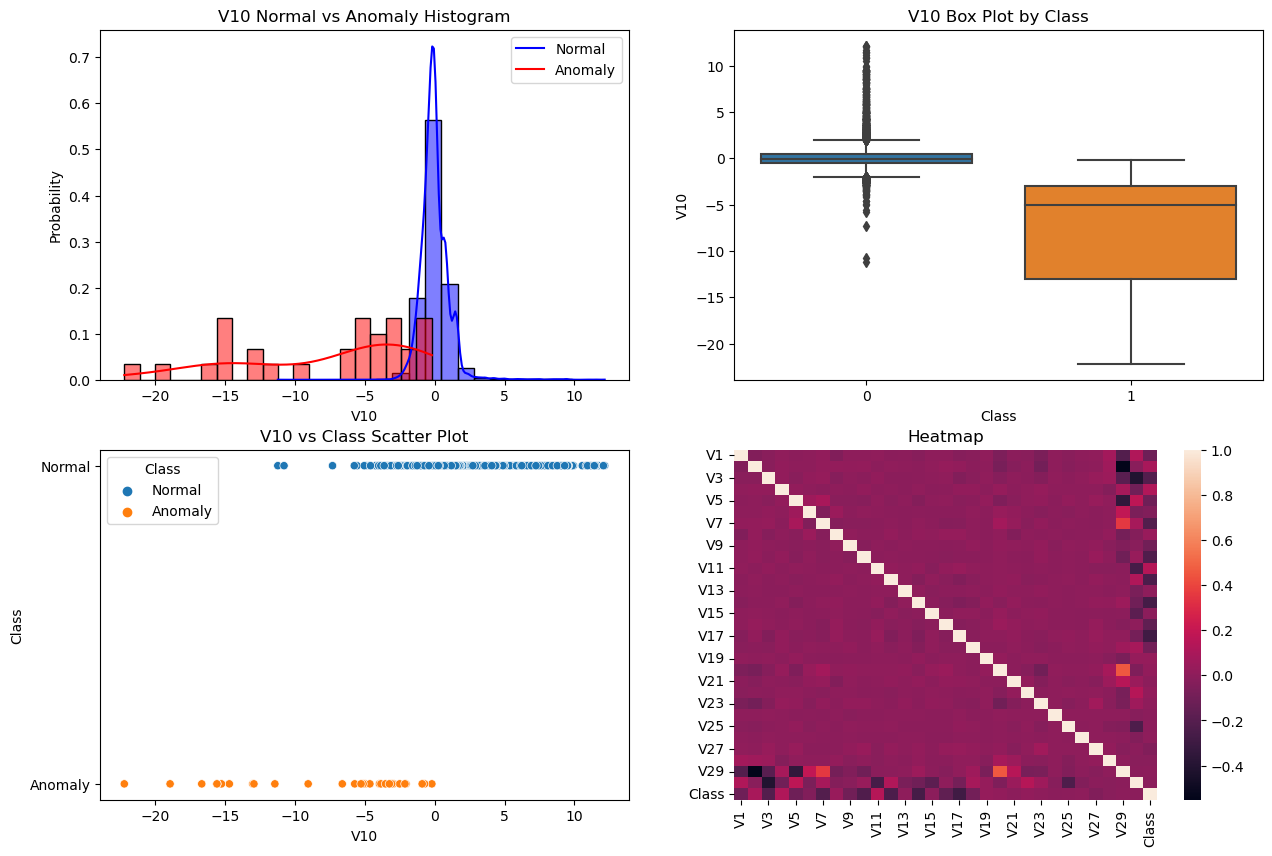

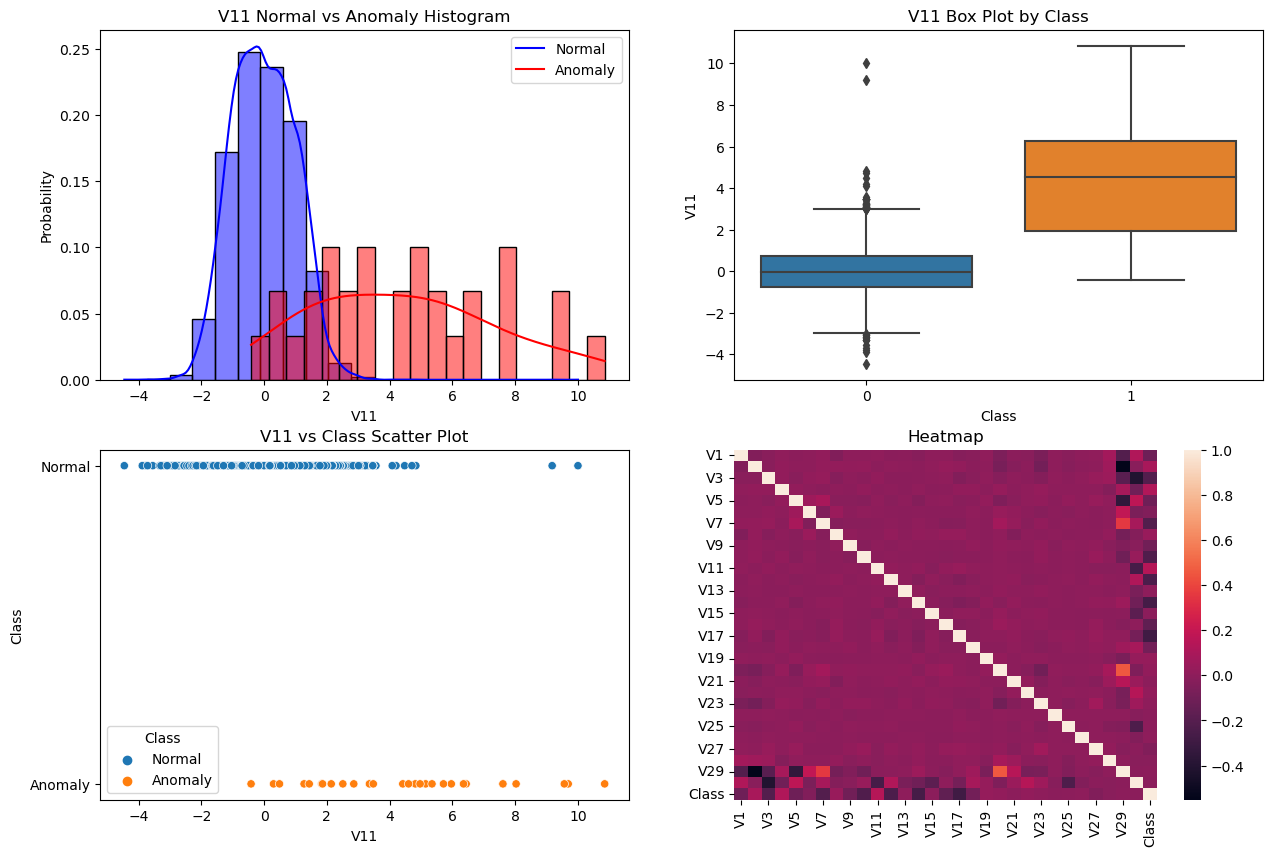

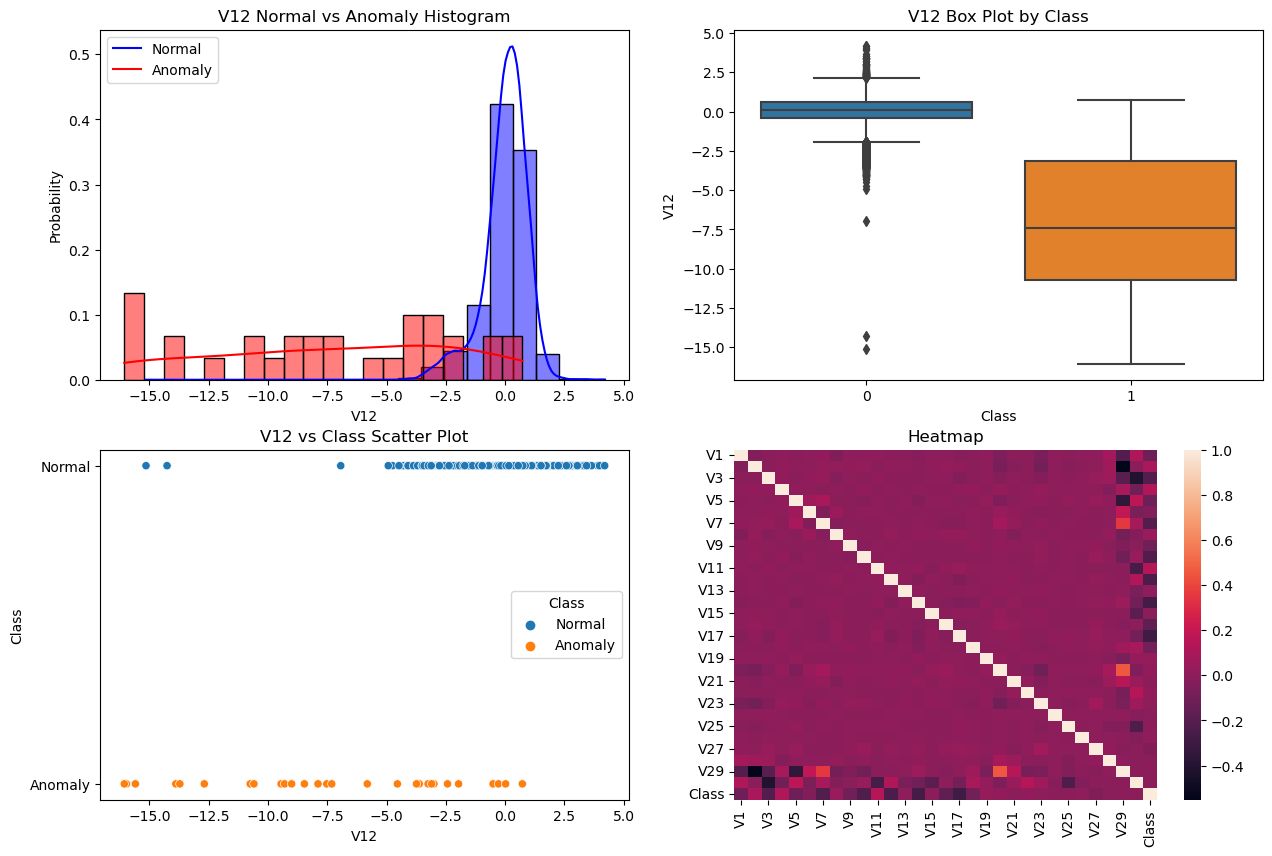

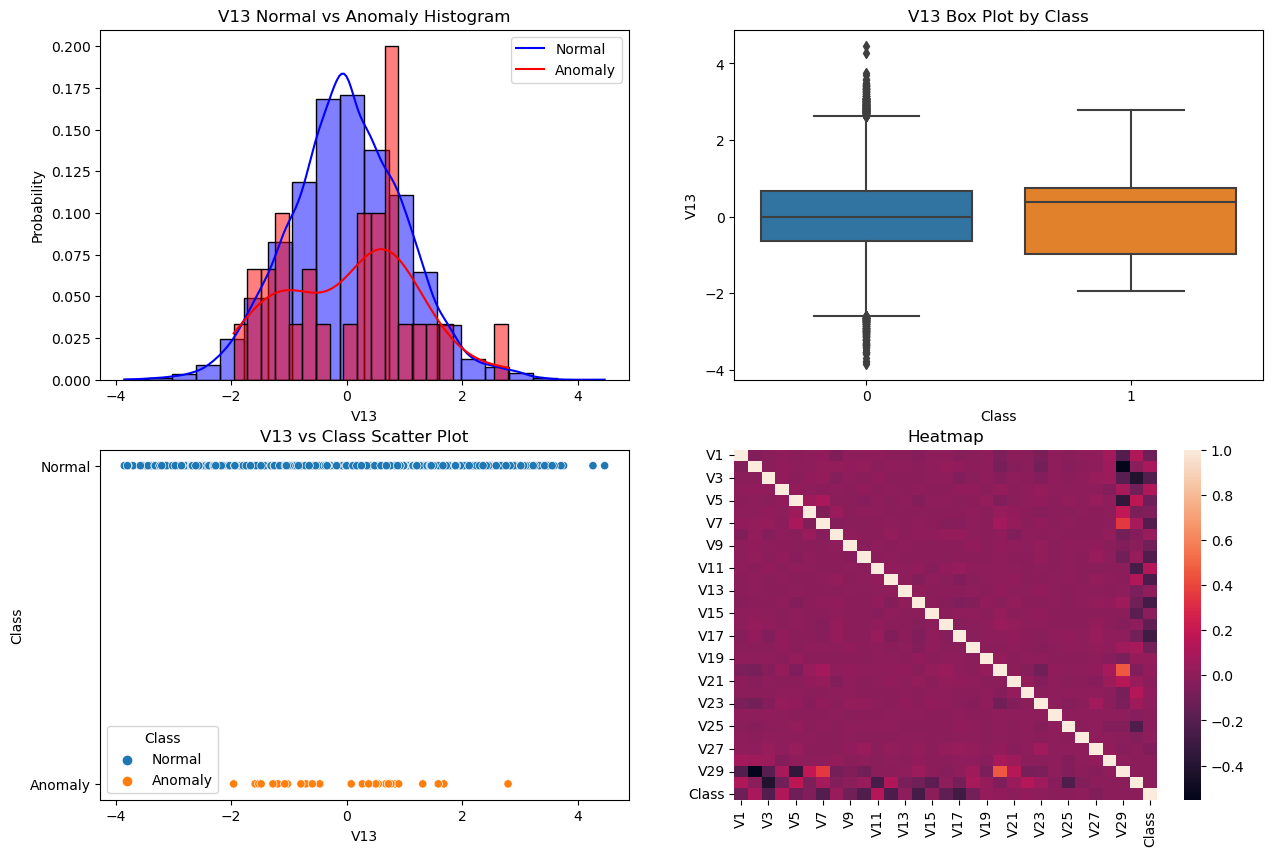

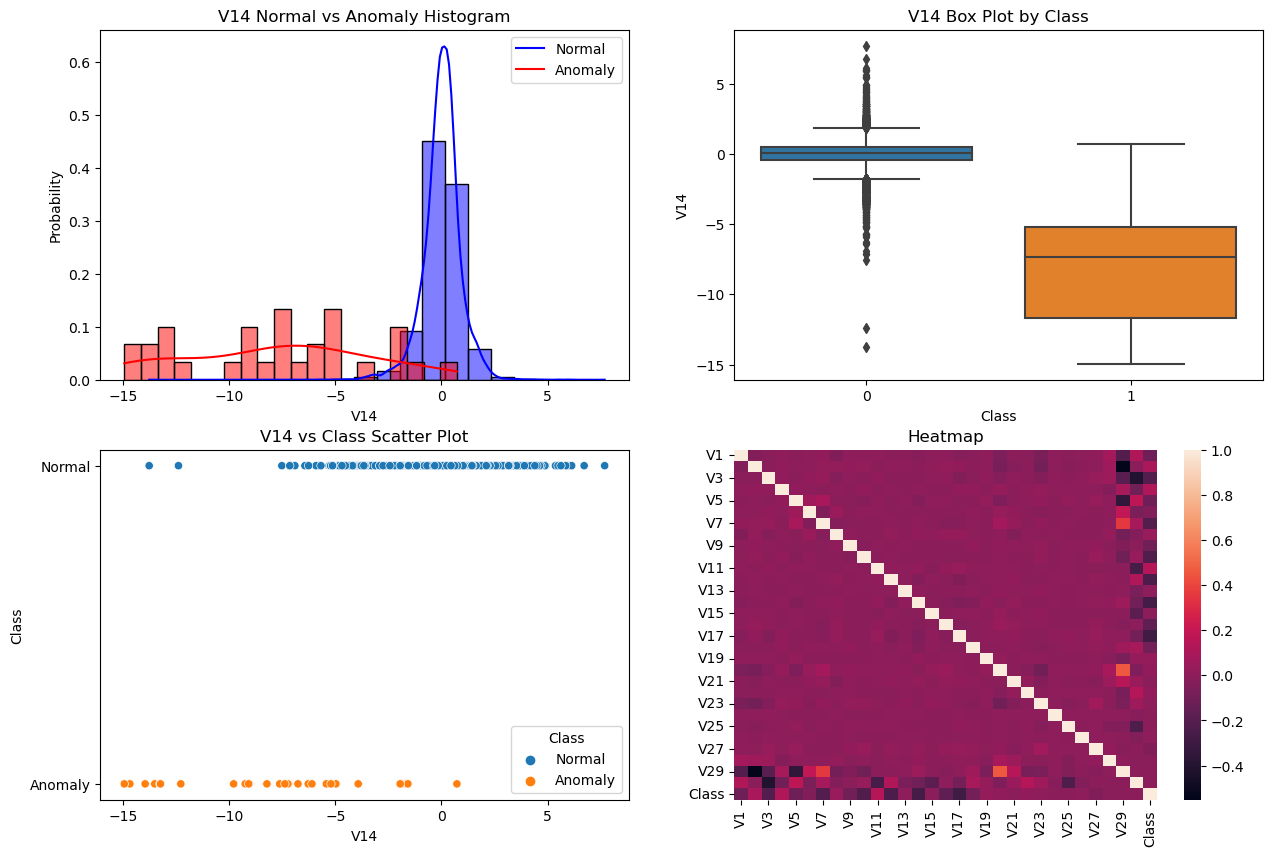

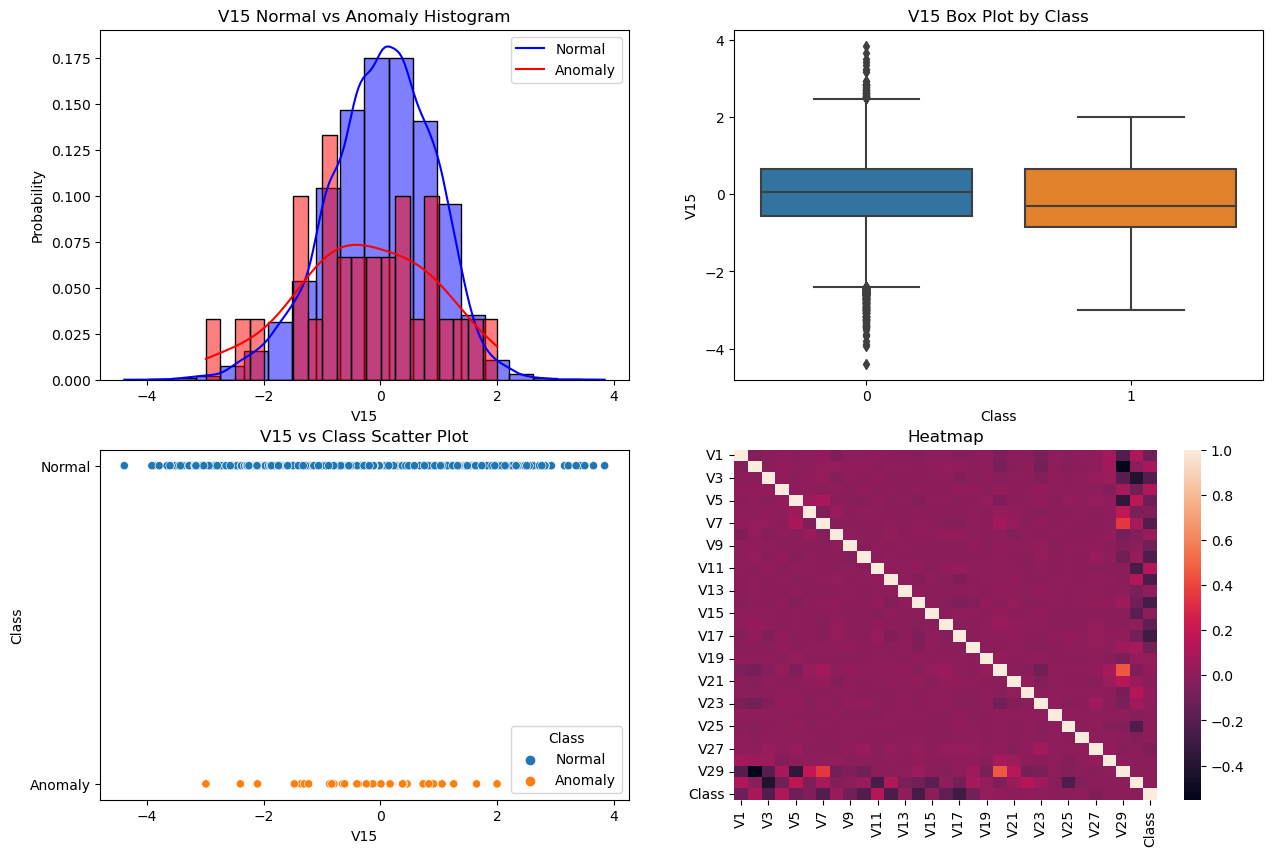

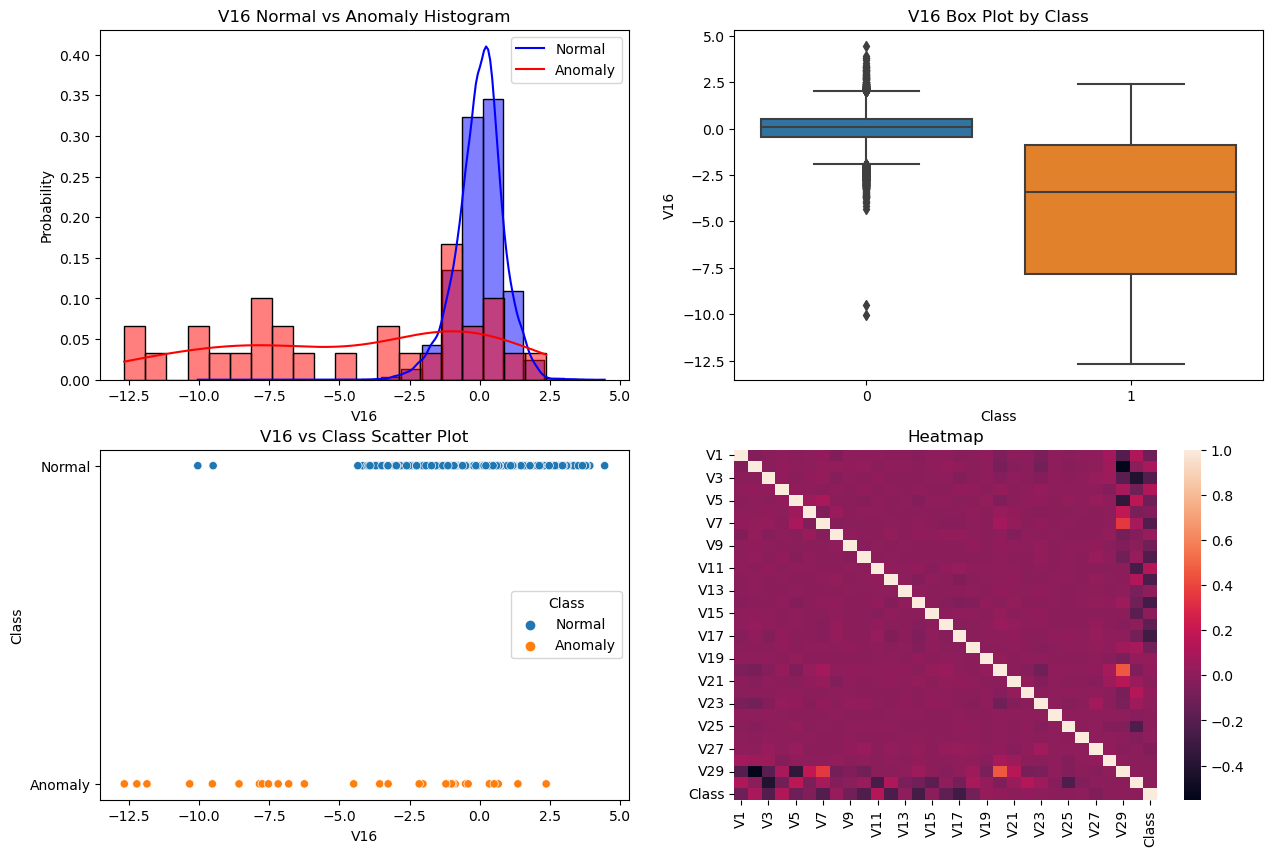

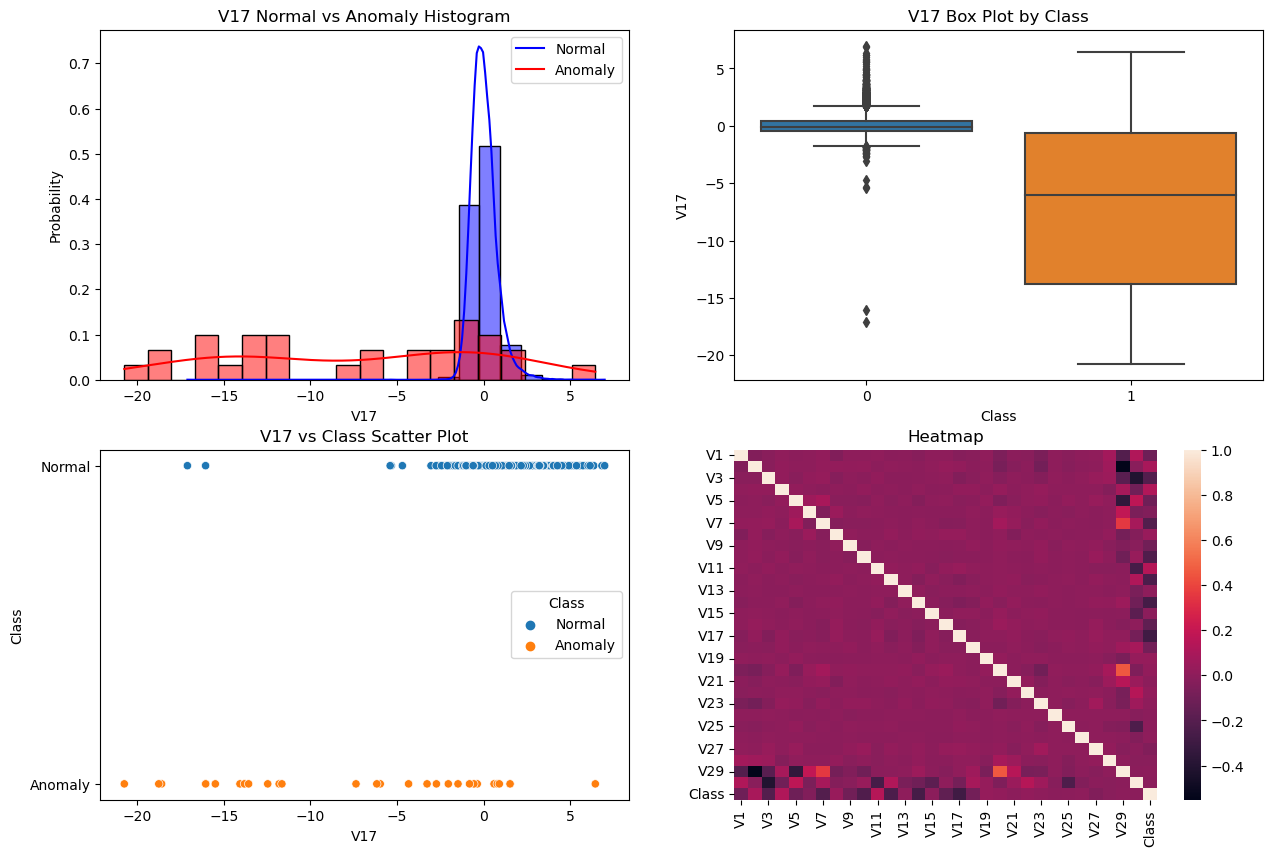

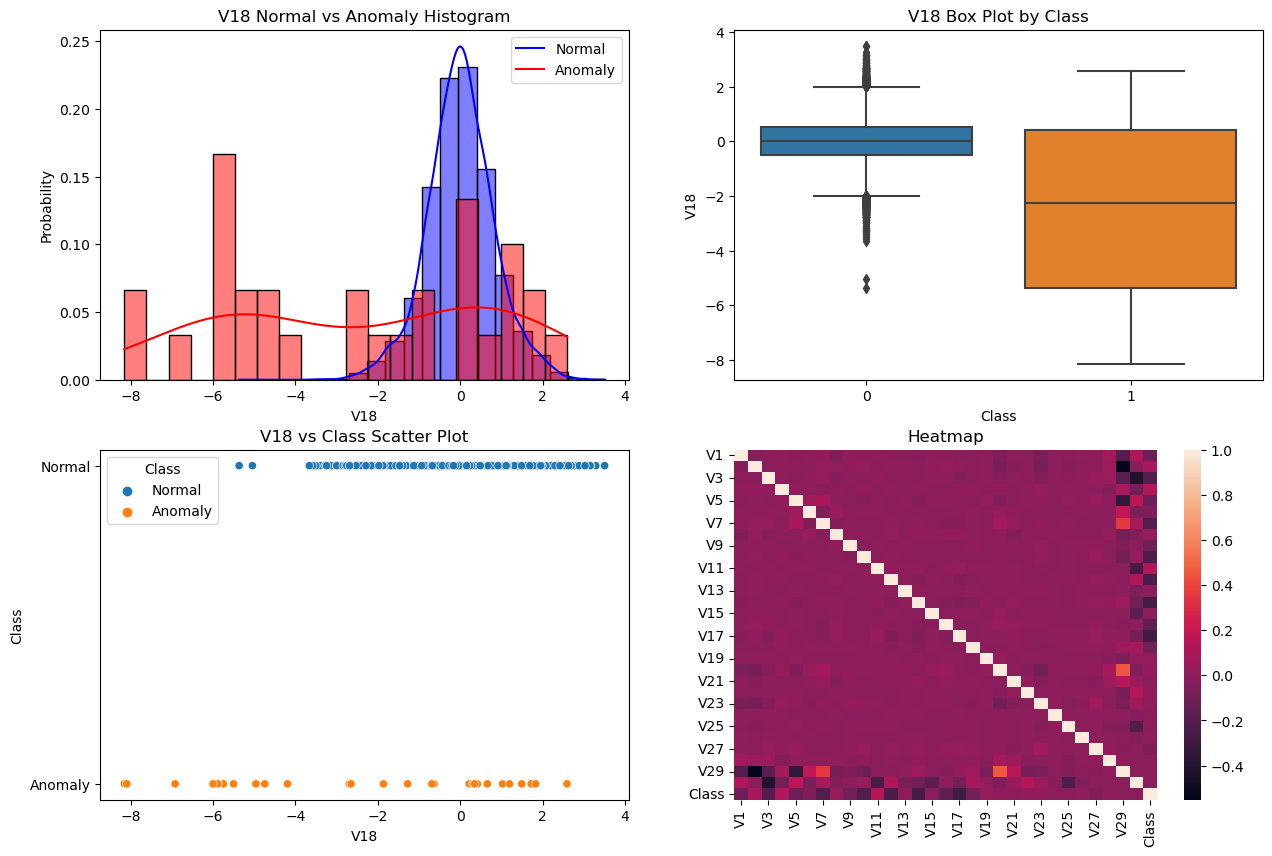

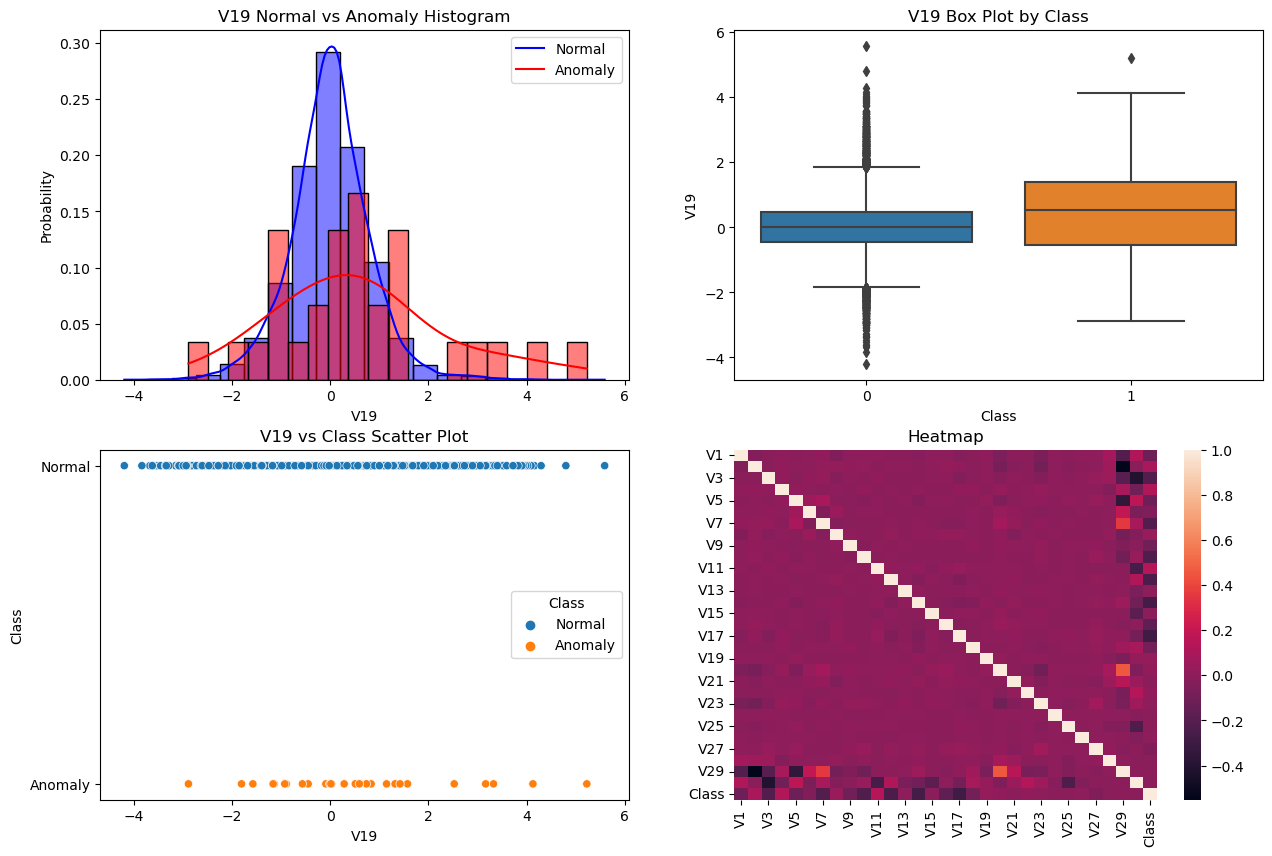

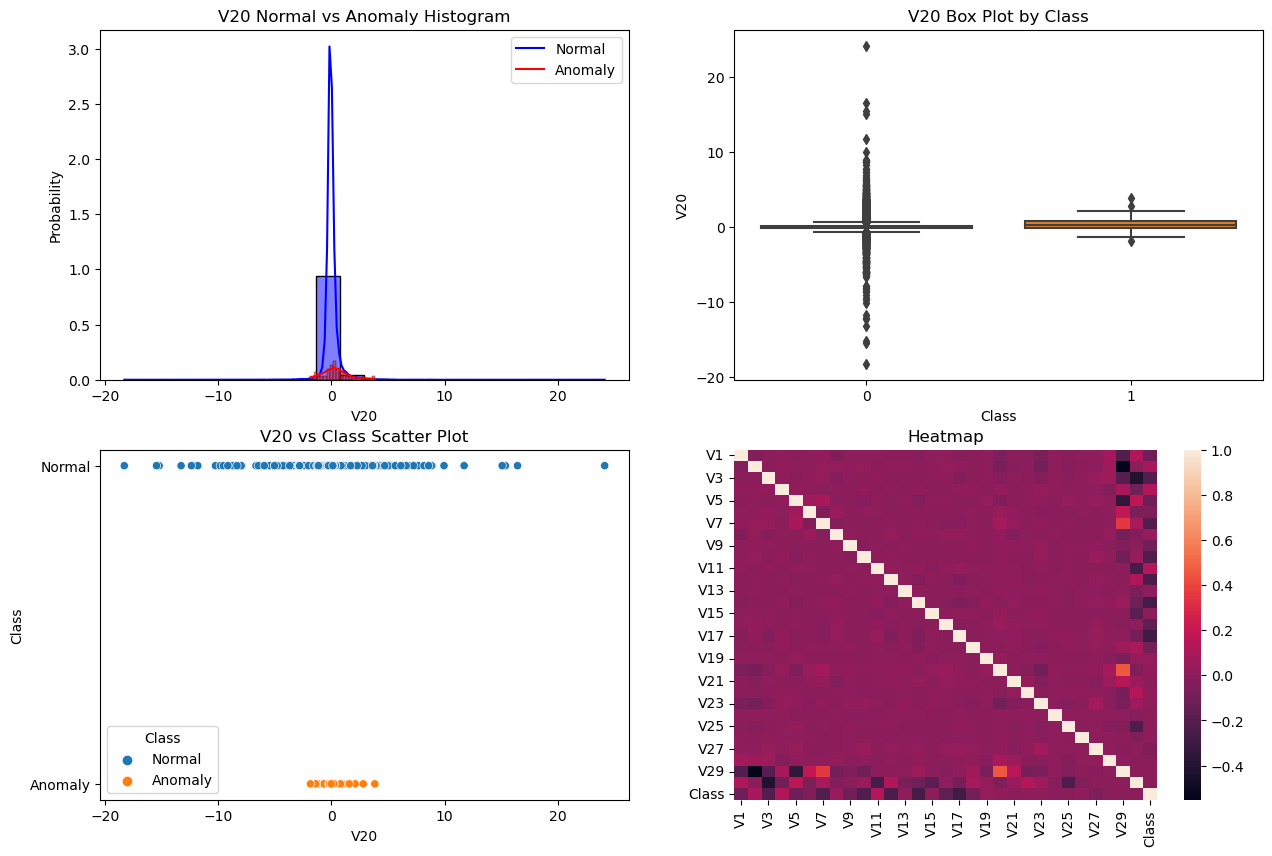

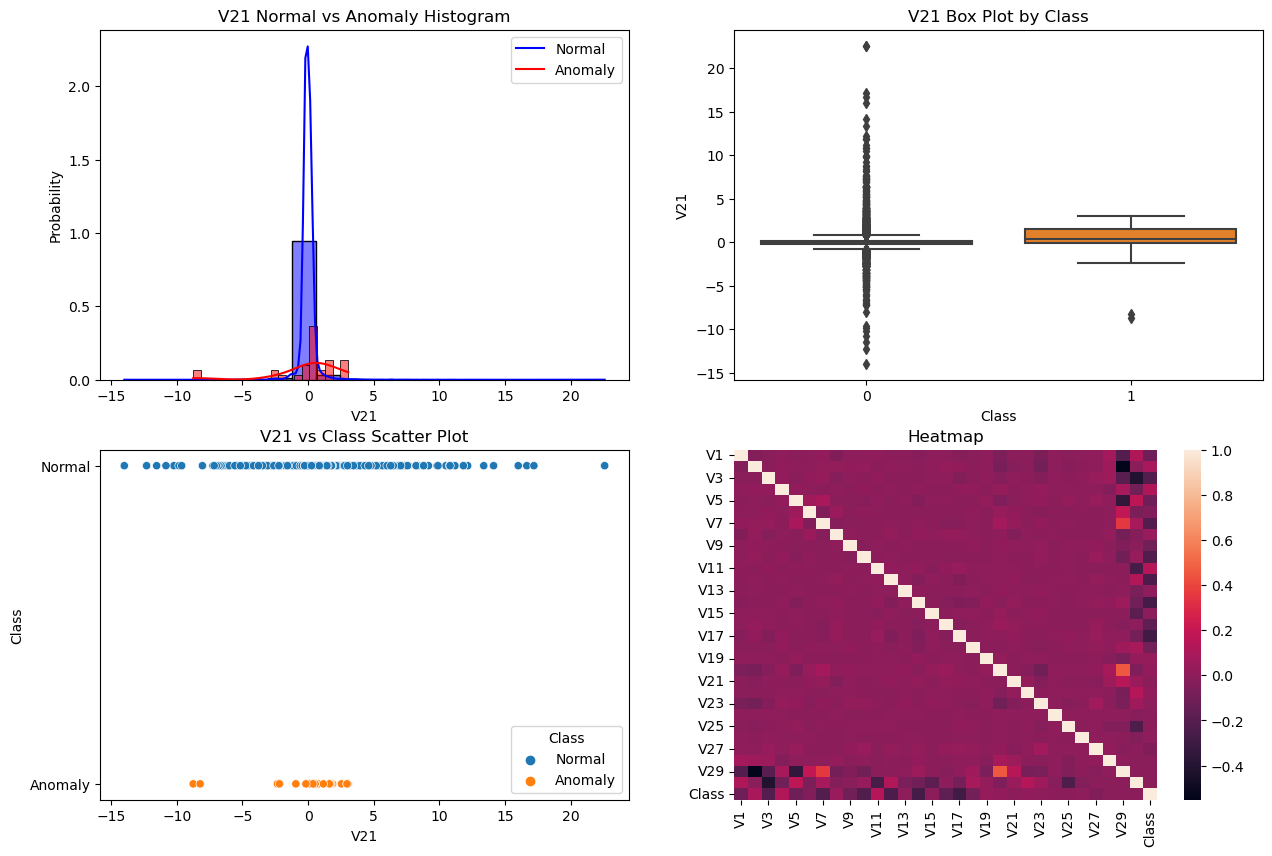

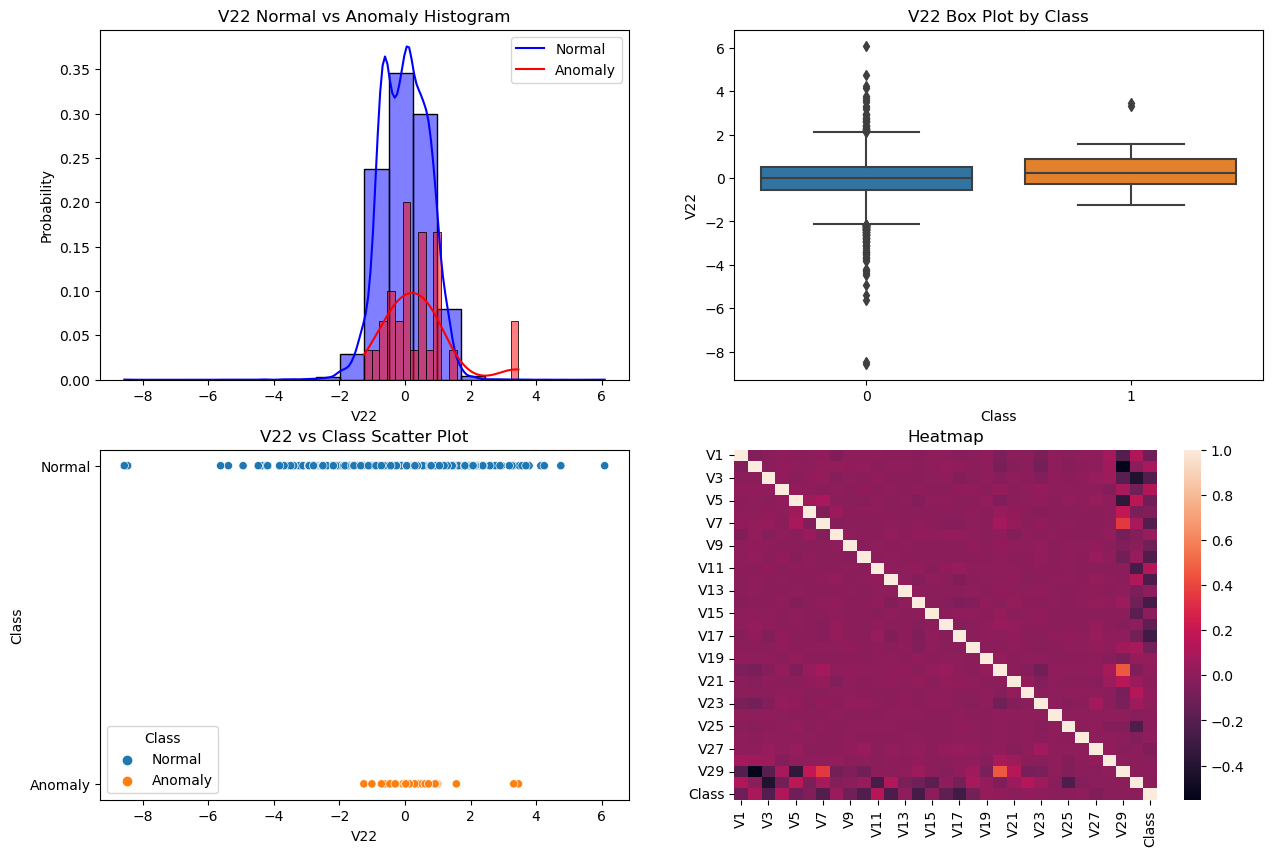

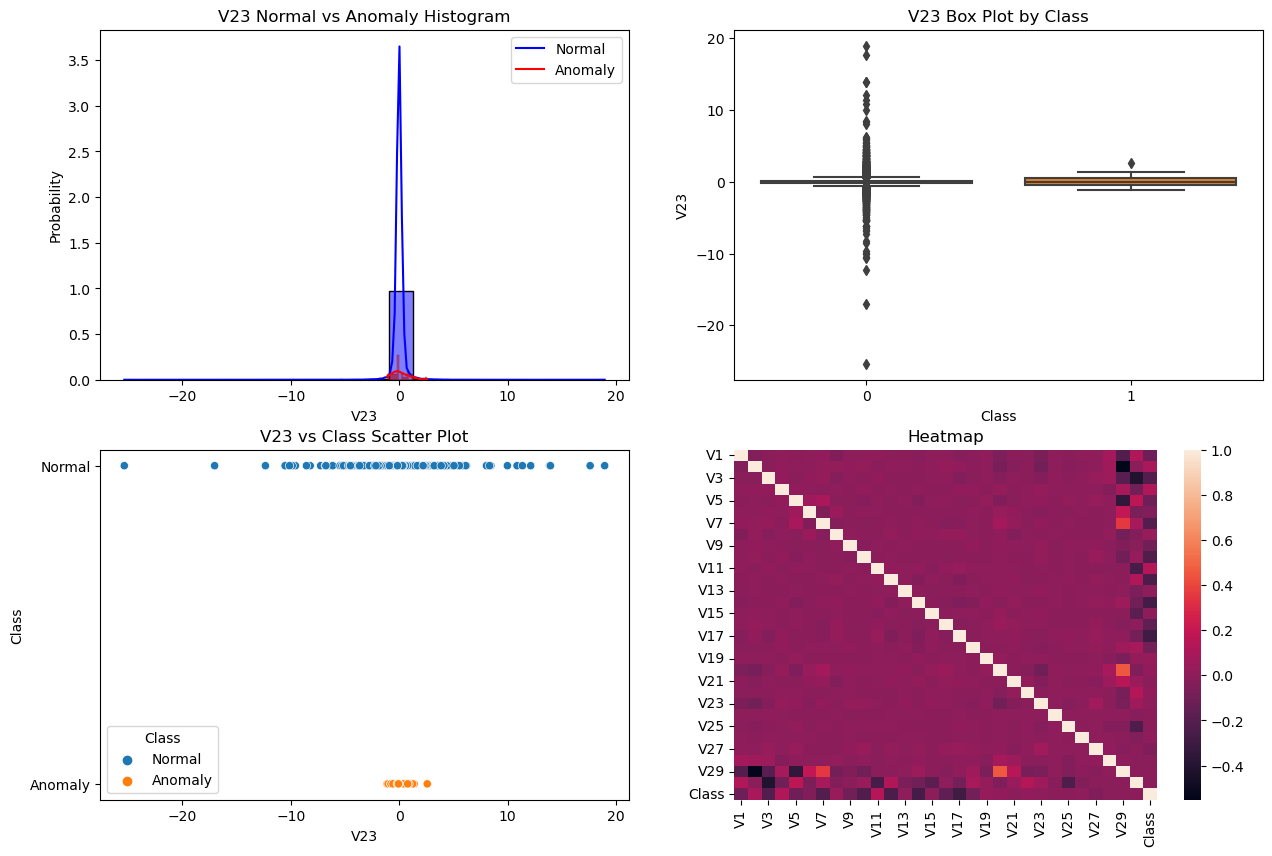

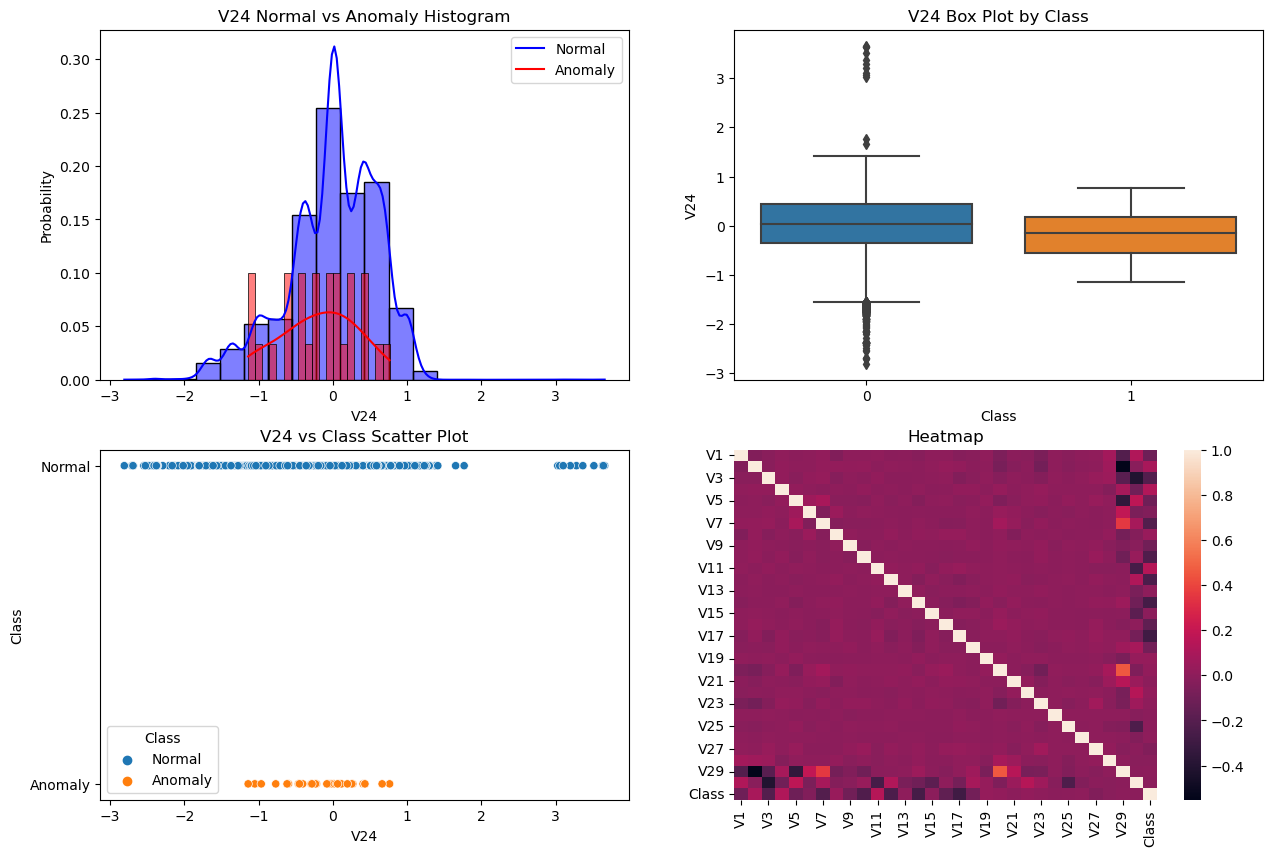

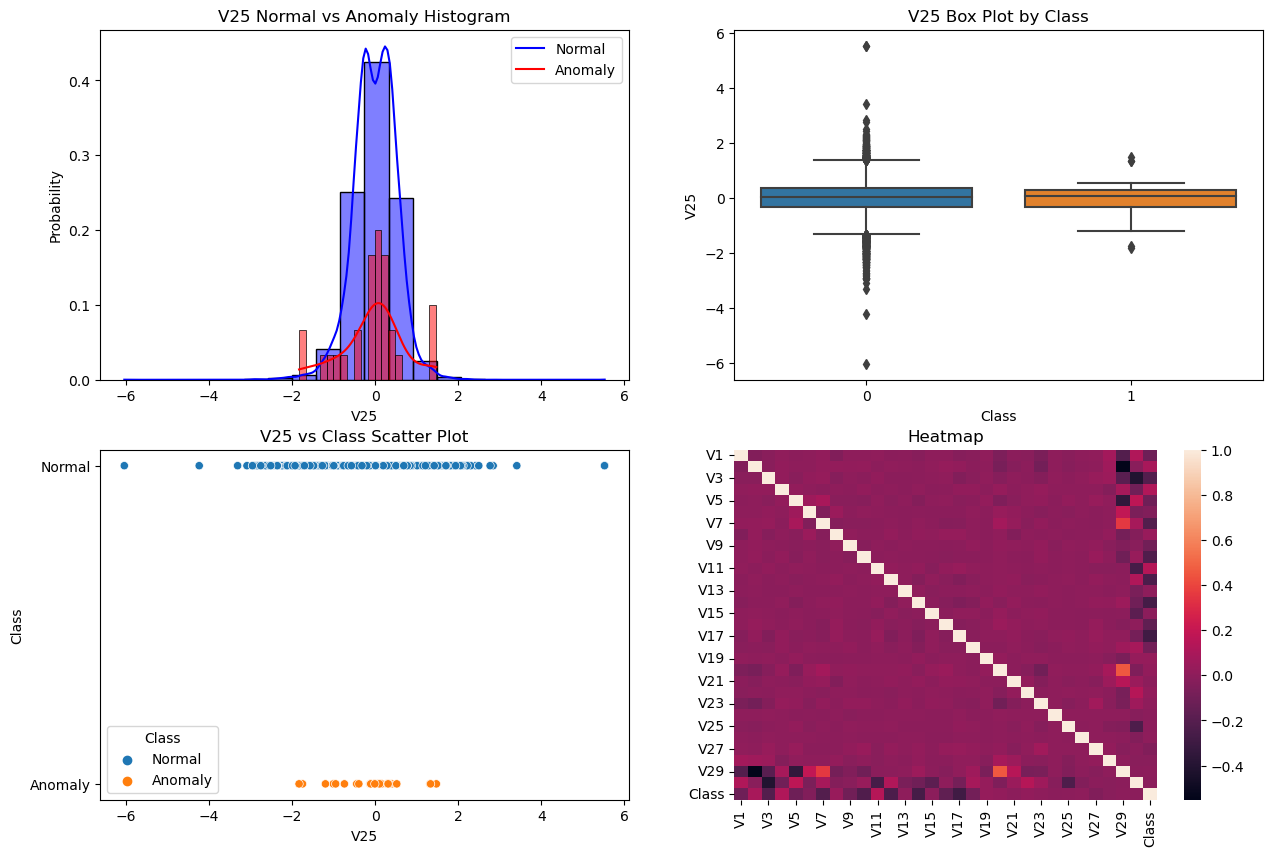

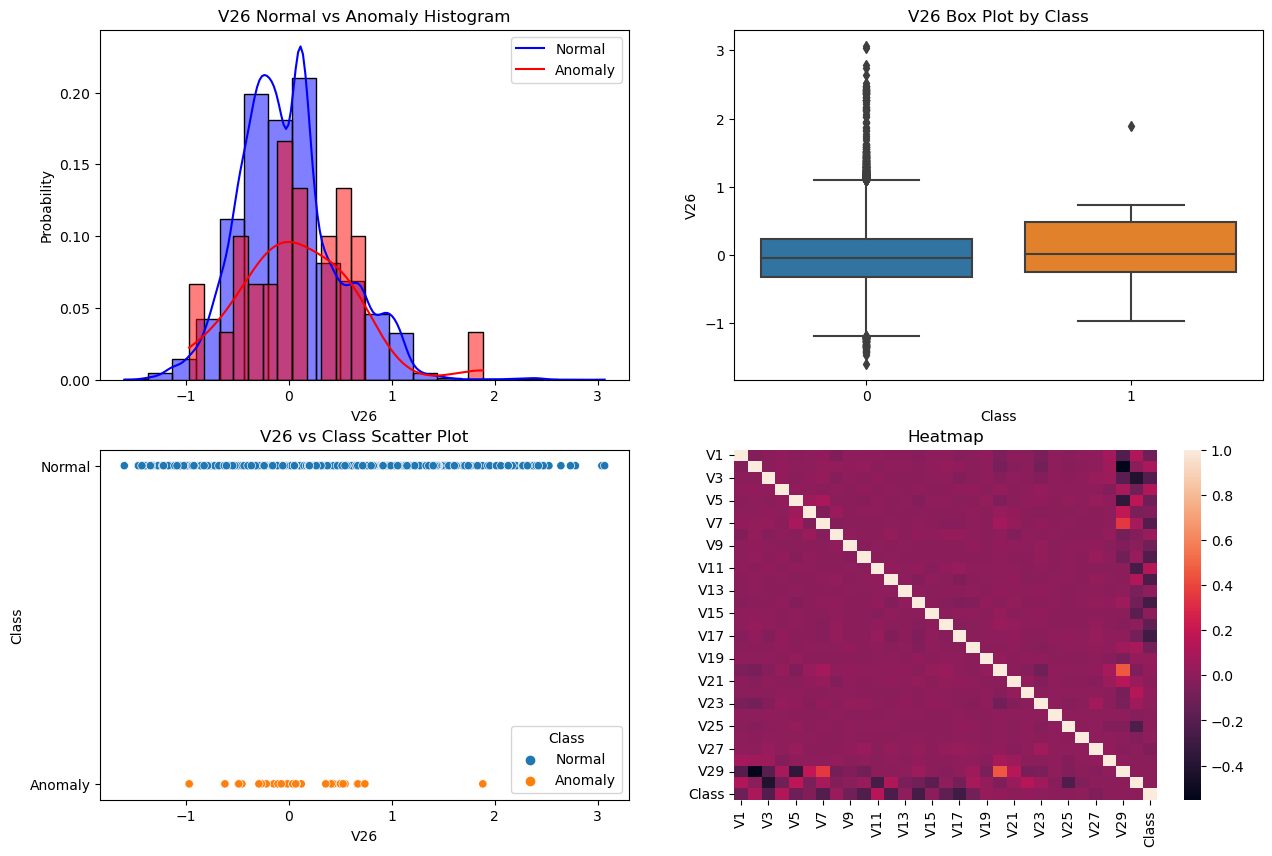

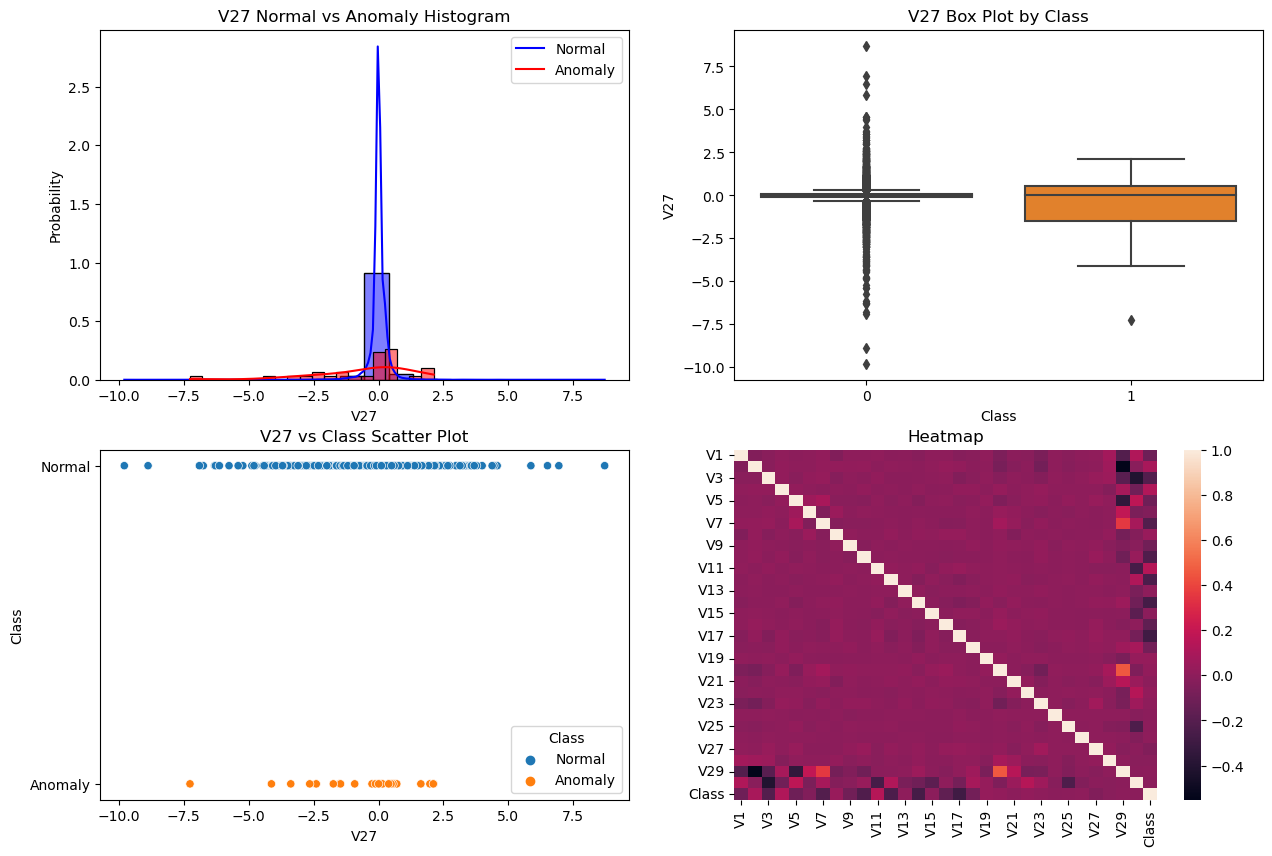

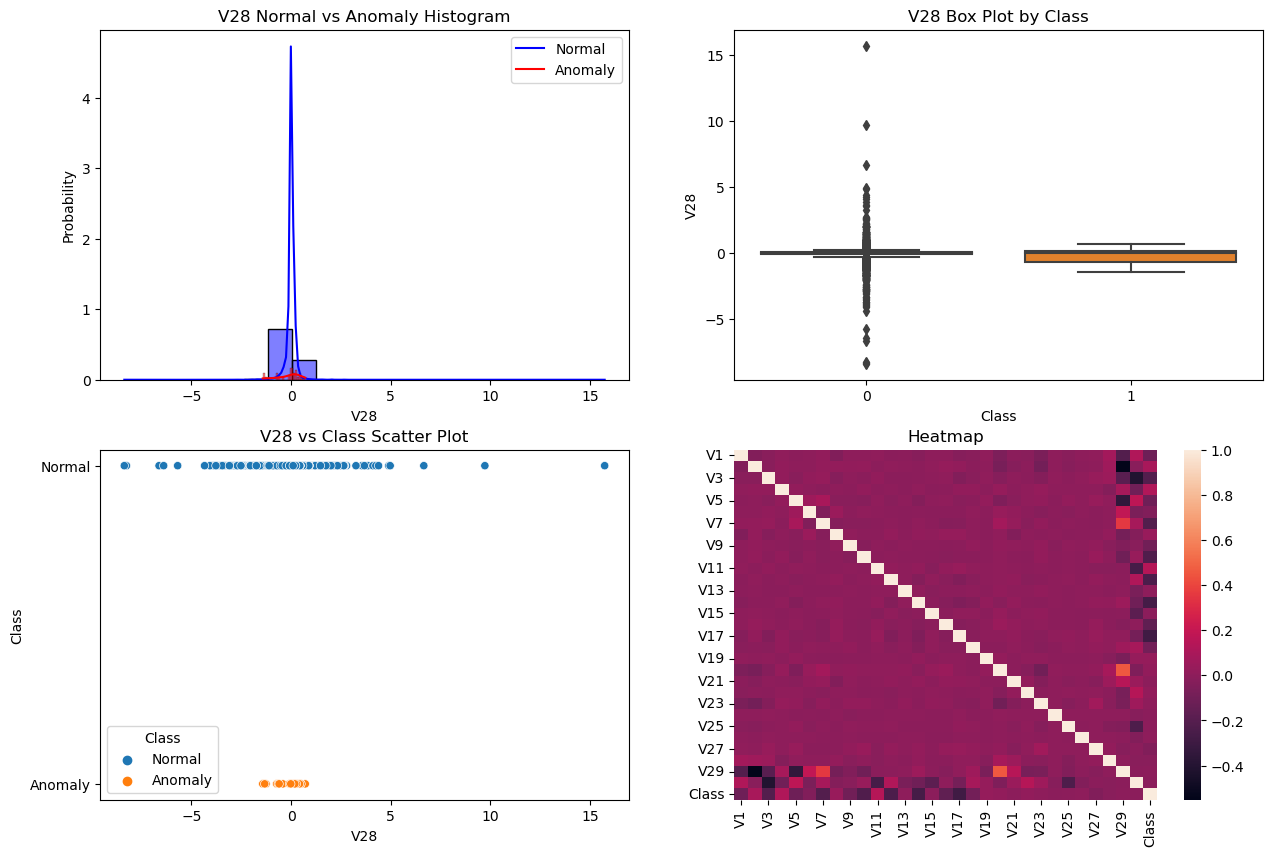

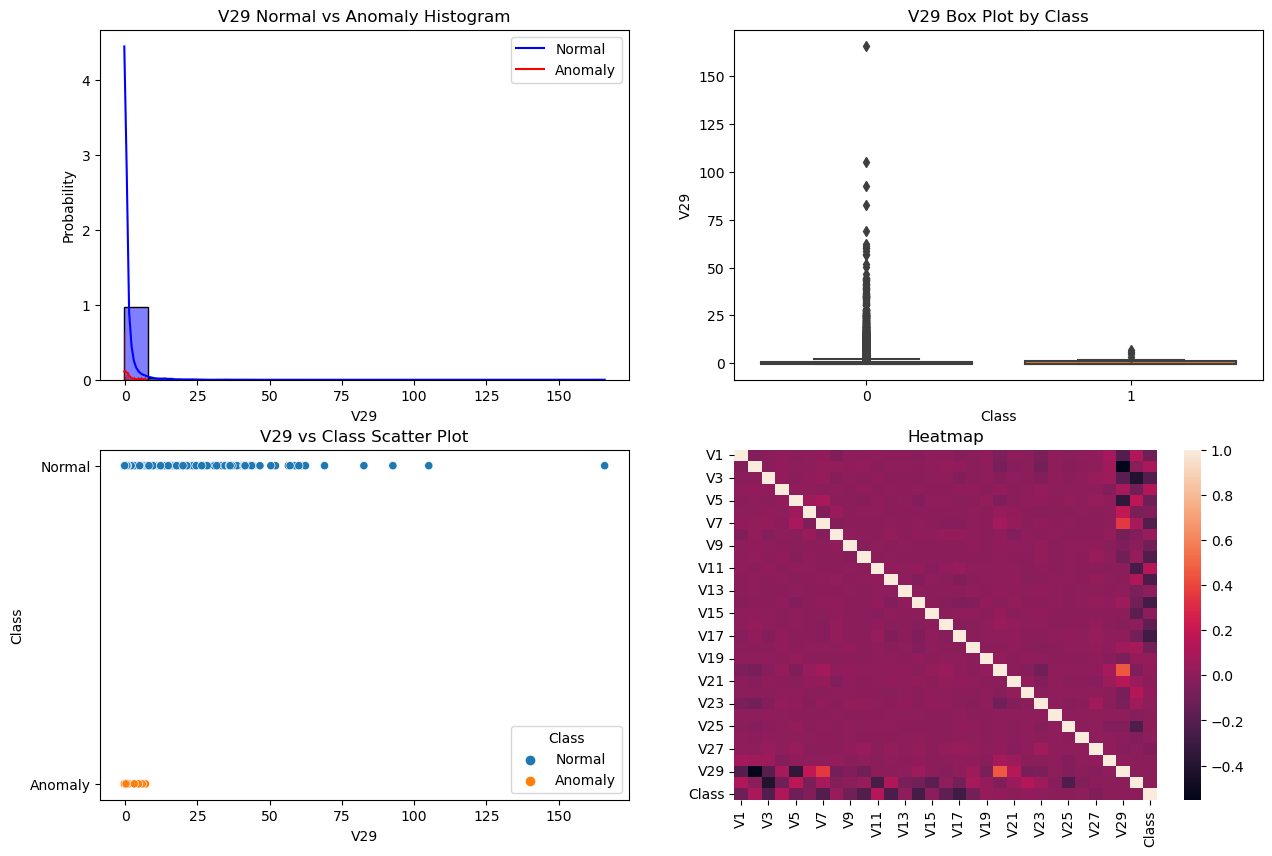

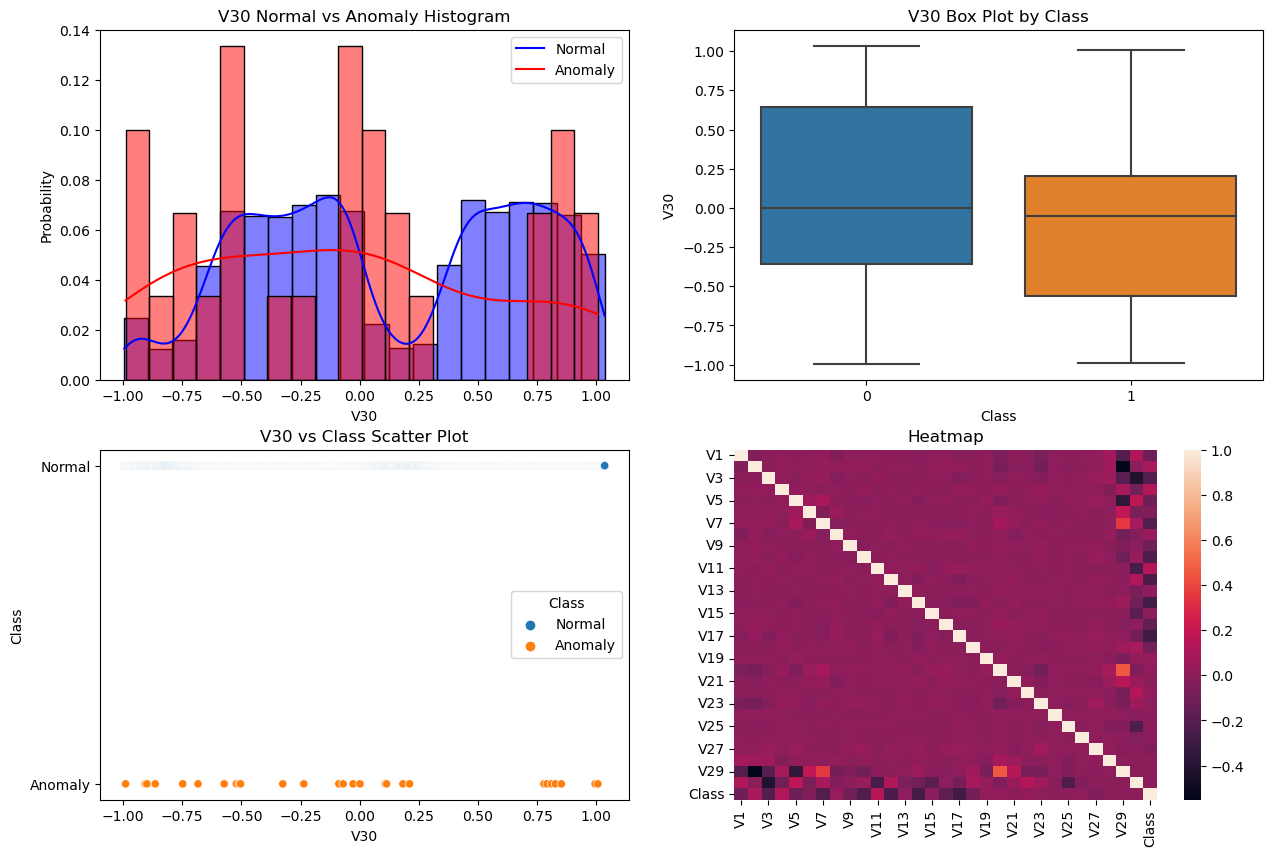

In [8]:
for index, col in enumerate(feature_cols):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    
    sns.histplot(val.loc[val['Class']==0, col], bins=20, color='b', stat='probability', label='normal', kde=True, ax=ax[0,0])
    sns.histplot(val.loc[val['Class']==1, col], bins=20, color='r', stat='probability', label='anomaly', kde=True, ax=ax[0,0])
    ax[0,0].set_title(f'{col} Normal vs Anomaly Histogram')
    ax[0,0].legend(('Normal', 'Anomaly'))
    
    sns.boxplot(data=val, x='Class', y=col, ax=ax[0,1])
    ax[0,1].set_title(f'{col} Box Plot by Class')
    
    sns.scatterplot(data=val_copy, x=val_copy[col], y=val_copy[label_col], hue='Class', ax=ax[1,0])
    ax[1,0].set_title(f'{col} vs Class Scatter Plot')
        
    sns.heatmap(val[val.columns[1:]].corr(), ax=ax[1,1])
    ax[1,1].set_title('Heatmap')
    
    plt.show()

- Feature들의 특성을 볼 수 있는 여러가지 시각화 방법 적용
    - Histogram & Boxplot : 정상 데이터와 이상 데이터의 분포를 비교하는 데에 용이
    - Feature vs Class Label Scatter Plot : 위와 마찬가지로 정상 데이터와 이상 데이터를 비교
    - Heatmap : Column간의 상관관계를 파악

- 문제점 : 이상 데이터의 개수가 정상 데이터에 비해 너무 적기 때문에 단순히 분포를 확인하는 것으로는 일반화의 성능이 떨어진다.

- 현재 데이터와 같이 정상 데이터에 비해 이상 데이터가 굉장히 희귀하다면 이상치 탐지의 정확성이 떨어질 수 있다.
- 이는 데이터 훈련 시 반영되는 이상치 데이터의 영향이 적기 때문이다.
- 따라서 Validation Data에서 정상데이터의 표본을 이상치 데이터의 개수와 같은 수만큼 뽑아 상관관계를 분석하고 Feature를 선별한다.

- Train Data에 대하여 MaxAbsScaler를 적합하고 그에 맞추어 모든 데이터를 scaling 해준다.

In [9]:
SCALER = MaxAbsScaler()
SCALER.fit(train[feature_cols])
train[feature_cols] = SCALER.transform(train[feature_cols])
val[feature_cols] = SCALER.transform(val[feature_cols])

In [10]:
print('정상데이터 개수: {}'.format(val['Class'].value_counts()[0]))
print('이상데이터 개수: {}'.format(val['Class'].value_counts()[1]))

정상데이터 개수: 28432
이상데이터 개수: 30


Text(0.5, 1.0, 'Undersample Validation Dataset')

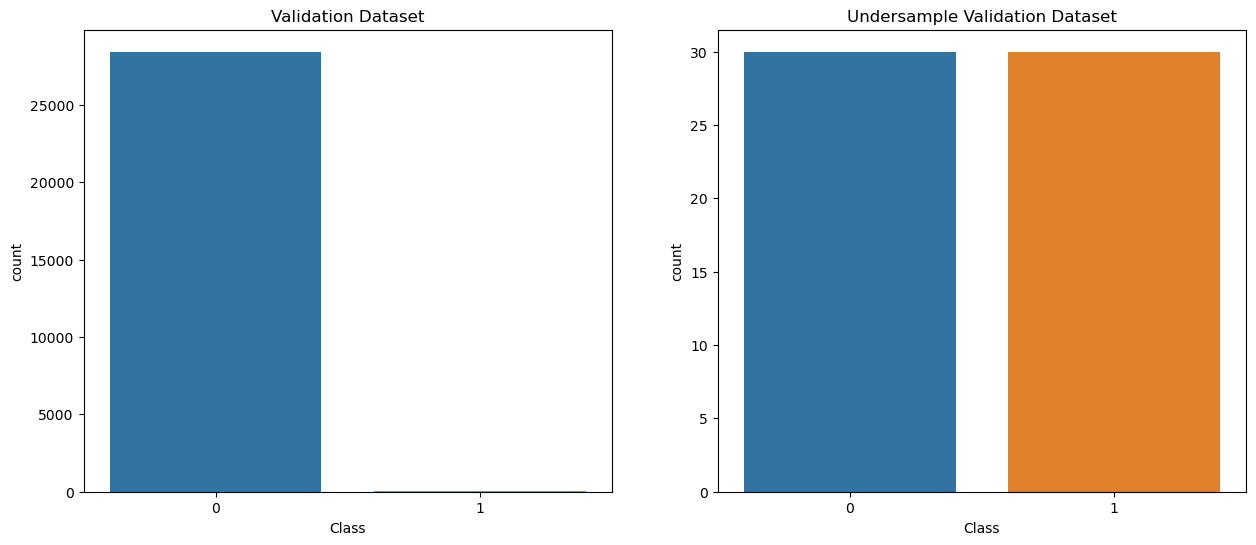

In [38]:
val_df = val.sample(frac=1)
anomaly_df = val_df.loc[val_df['Class']==1]
normal_df = val_df.loc[val_df['Class']==0][:len(anomaly_df)]
sample_df = pd.concat([normal_df, anomaly_df])
sample_df = sample_df.sample(frac=1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(data=val_df, x='Class', ax=ax1)
ax1.set_title('Validation Dataset')
sns.countplot(data=sample_df, x='Class', ax=ax2)
ax2.set_title('Undersample Validation Dataset')


In [16]:
X = sample_df[sample_df.columns[1:-1]]
Y = sample_df['Class']

X_tsne = TSNE(n_components=2, random_state=302).fit_transform(X.values)
X_pca = PCA(n_components=2, random_state=302).fit_transform(X.values)
X_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=302).fit_transform(X.values)

Text(0.5, 1.0, 'Truncated SVD')

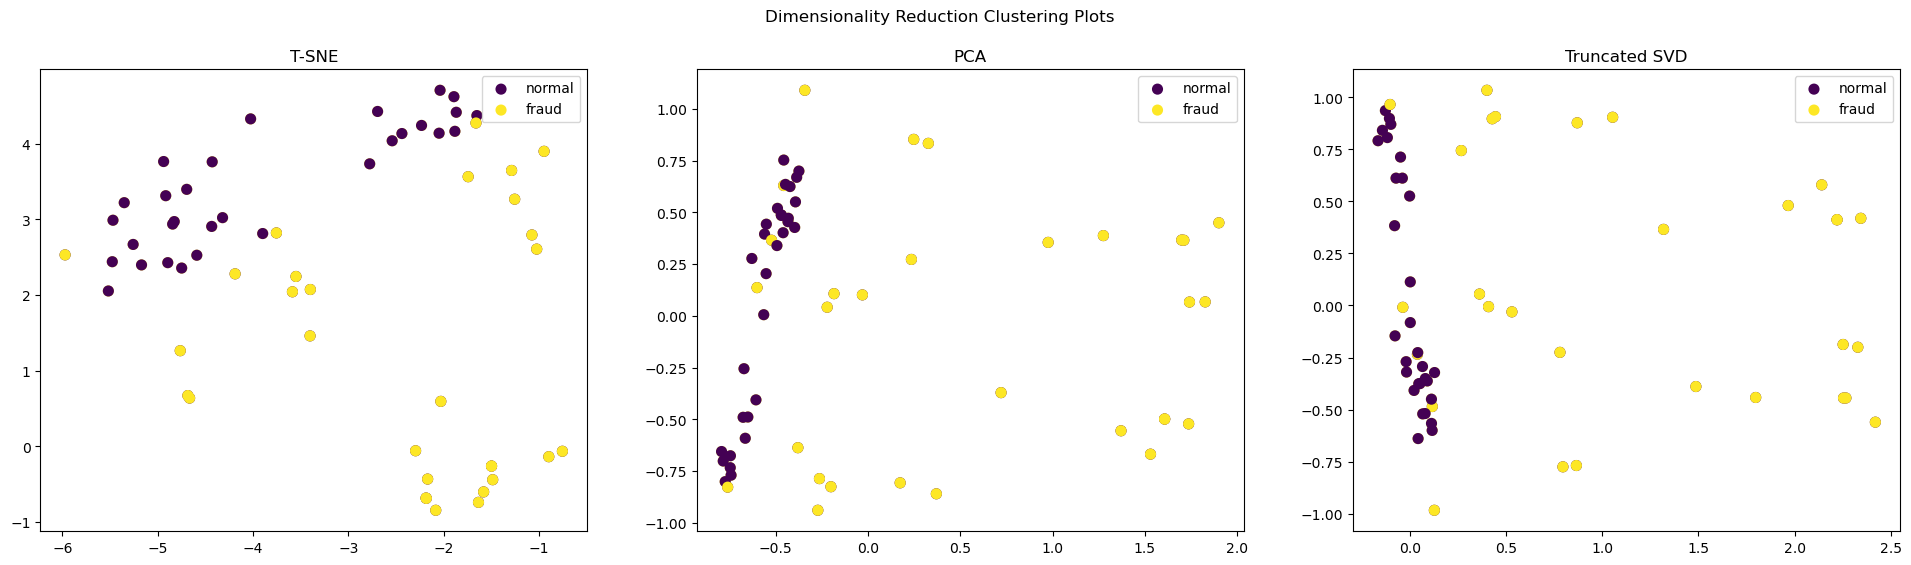

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Dimensionality Reduction Clustering Plots')

ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=(Y==0), label='normal', linewidths=2)
ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=(Y==1), label='fraud', linewidths=2)
ax1.legend(('normal', 'fraud'))
ax1.set_title('T-SNE')

ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=(Y==0), label='normal', linewidths=2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=(Y==1), label='fraud', linewidths=2)
ax2.legend(('normal', 'fraud'))
ax2.set_title('PCA')

ax3.scatter(X_svd[:, 0], X_svd[:, 1], c=(Y==0), label='normal', linewidths=2)
ax3.scatter(X_svd[:, 0], X_svd[:, 1], c=(Y==1), label='fraud', linewidths=2)
ax3.legend(('normal', 'fraud'))
ax3.set_title('Truncated SVD')

Text(0.5, 1.0, 'Sample Data HeatMap')

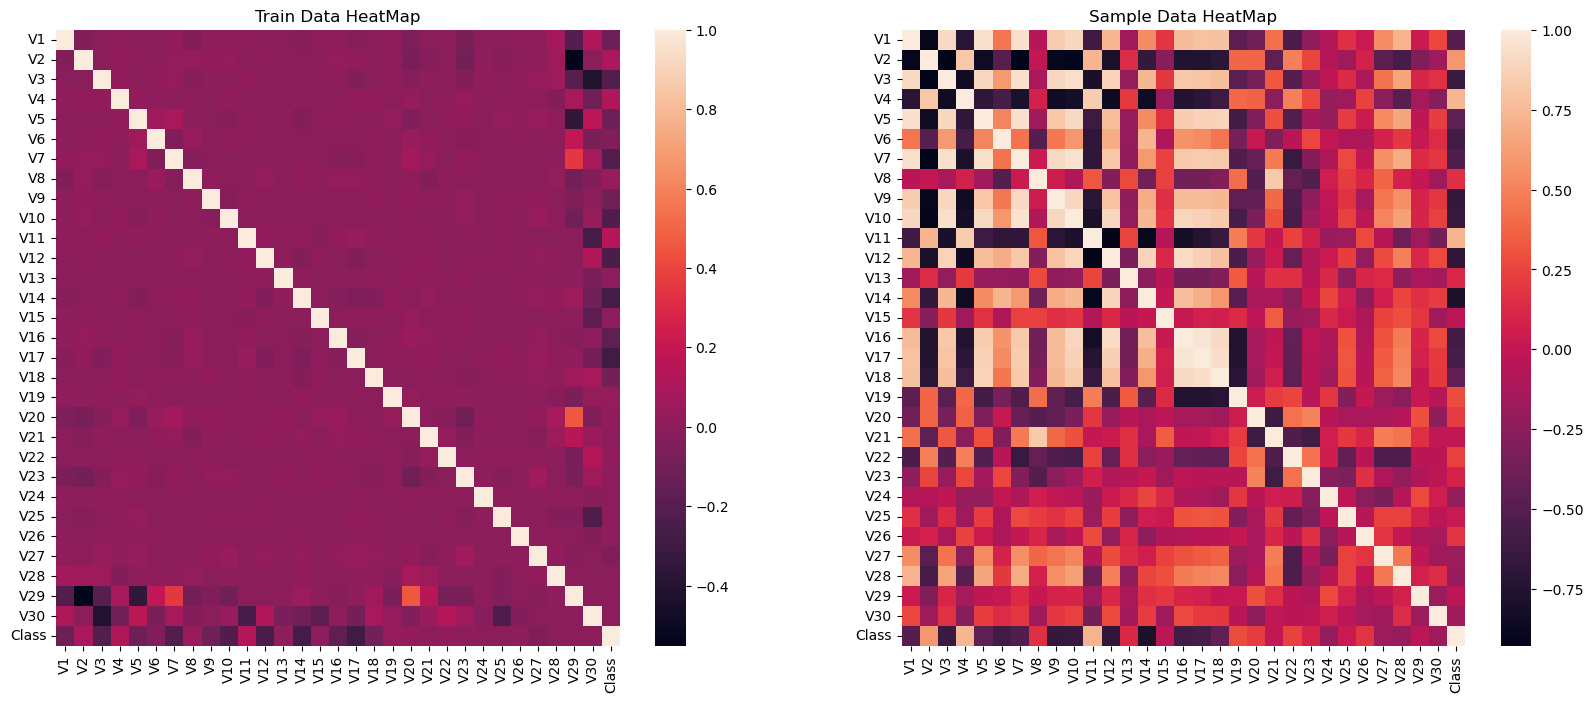

In [11]:
plt, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), squeeze=False)
sns.heatmap(data=val[val.columns[1:]].corr(), ax=ax[0,0])
ax[0,0].set_title('Train Data HeatMap')
sns.heatmap(data=sample_df[sample_df.columns[1:]].corr(), ax=ax[0,1])
ax[0,1].set_title('Sample Data HeatMap')

- 확실히 전체 데이터에 비해 표본 데이터의 상관관계를 보았을 때 더 많은 관계가 관측됨을 확인할 수 있다.
- 이 중 중점적으로 보아야 할 것은 각 feature column과 class column의 상관관계이다.
- 일반적으로 Correlation Coefficient를 해석하는 방법은 다음과 같다:
<br><br>
    - Correlation Coefficient = r
    - 0 $\le$ r < 0.2 : very weak or no association
    - 0.2 $\le$ r < 0.4 : weak association>>
    - 0.4 $\le$ r < 0.6 : moderate association
    - 0.6 $\le$ r < 0.8 : strong association
    - 0.8 $\le$ r < 1 : very strong association
    <br><br>
- 따라서 0.4 이상의 correlation을 보여주는 feature들을 선별한다.

In [39]:
selected_feature = list()
corr = sample_df.corr()['Class'][1:-1]
for i, r in enumerate(corr):
    if np.abs(r) >= 0.4 : selected_feature.append('V{}'.format(i+1))
print(len(selected_feature))
print(selected_feature)

15
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']


Text(0, -0.4, 'THRESHOLD')

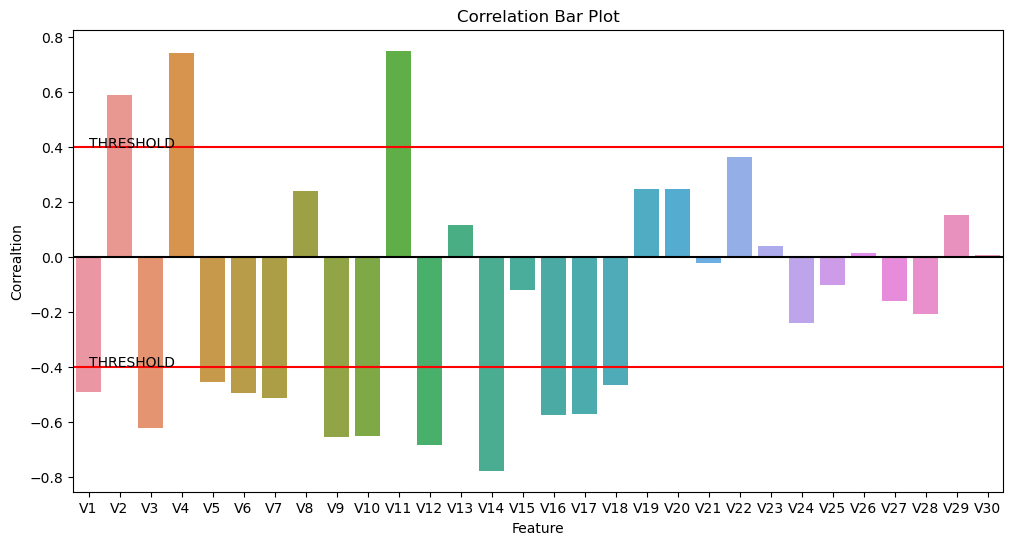

In [84]:
corr_dict = {}
for i, x in enumerate(corr):
    corr_dict[f'V{i+1}'] = x
keys = list(corr_dict.keys())
values = [float(corr_dict[k]) for k in keys]
plt.figure(figsize=(12, 6))
sns.barplot(x=keys, y=values)
plt.axhline(0.4, color='red')
plt.axhline(-0.4, color='red')
plt.axhline(0, color='black')
plt.title('Correlation Bar Plot')
plt.xlabel('Feature')
plt.ylabel('Correaltion')
plt.annotate('THRESHOLD', (0, 0.4))
plt.annotate('THRESHOLD', (0, -0.4))

In [16]:
condition = (sample_df['Class']==0)
sample_df_copy = sample_df.copy()
sample_df_copy.loc[condition, 'Class'] = 'Normal'
sample_df_copy.loc[~condition, 'Class'] = 'Anomaly'
sample_df_copy['Class'].value_counts()

Normal     30
Anomaly    30
Name: Class, dtype: int64

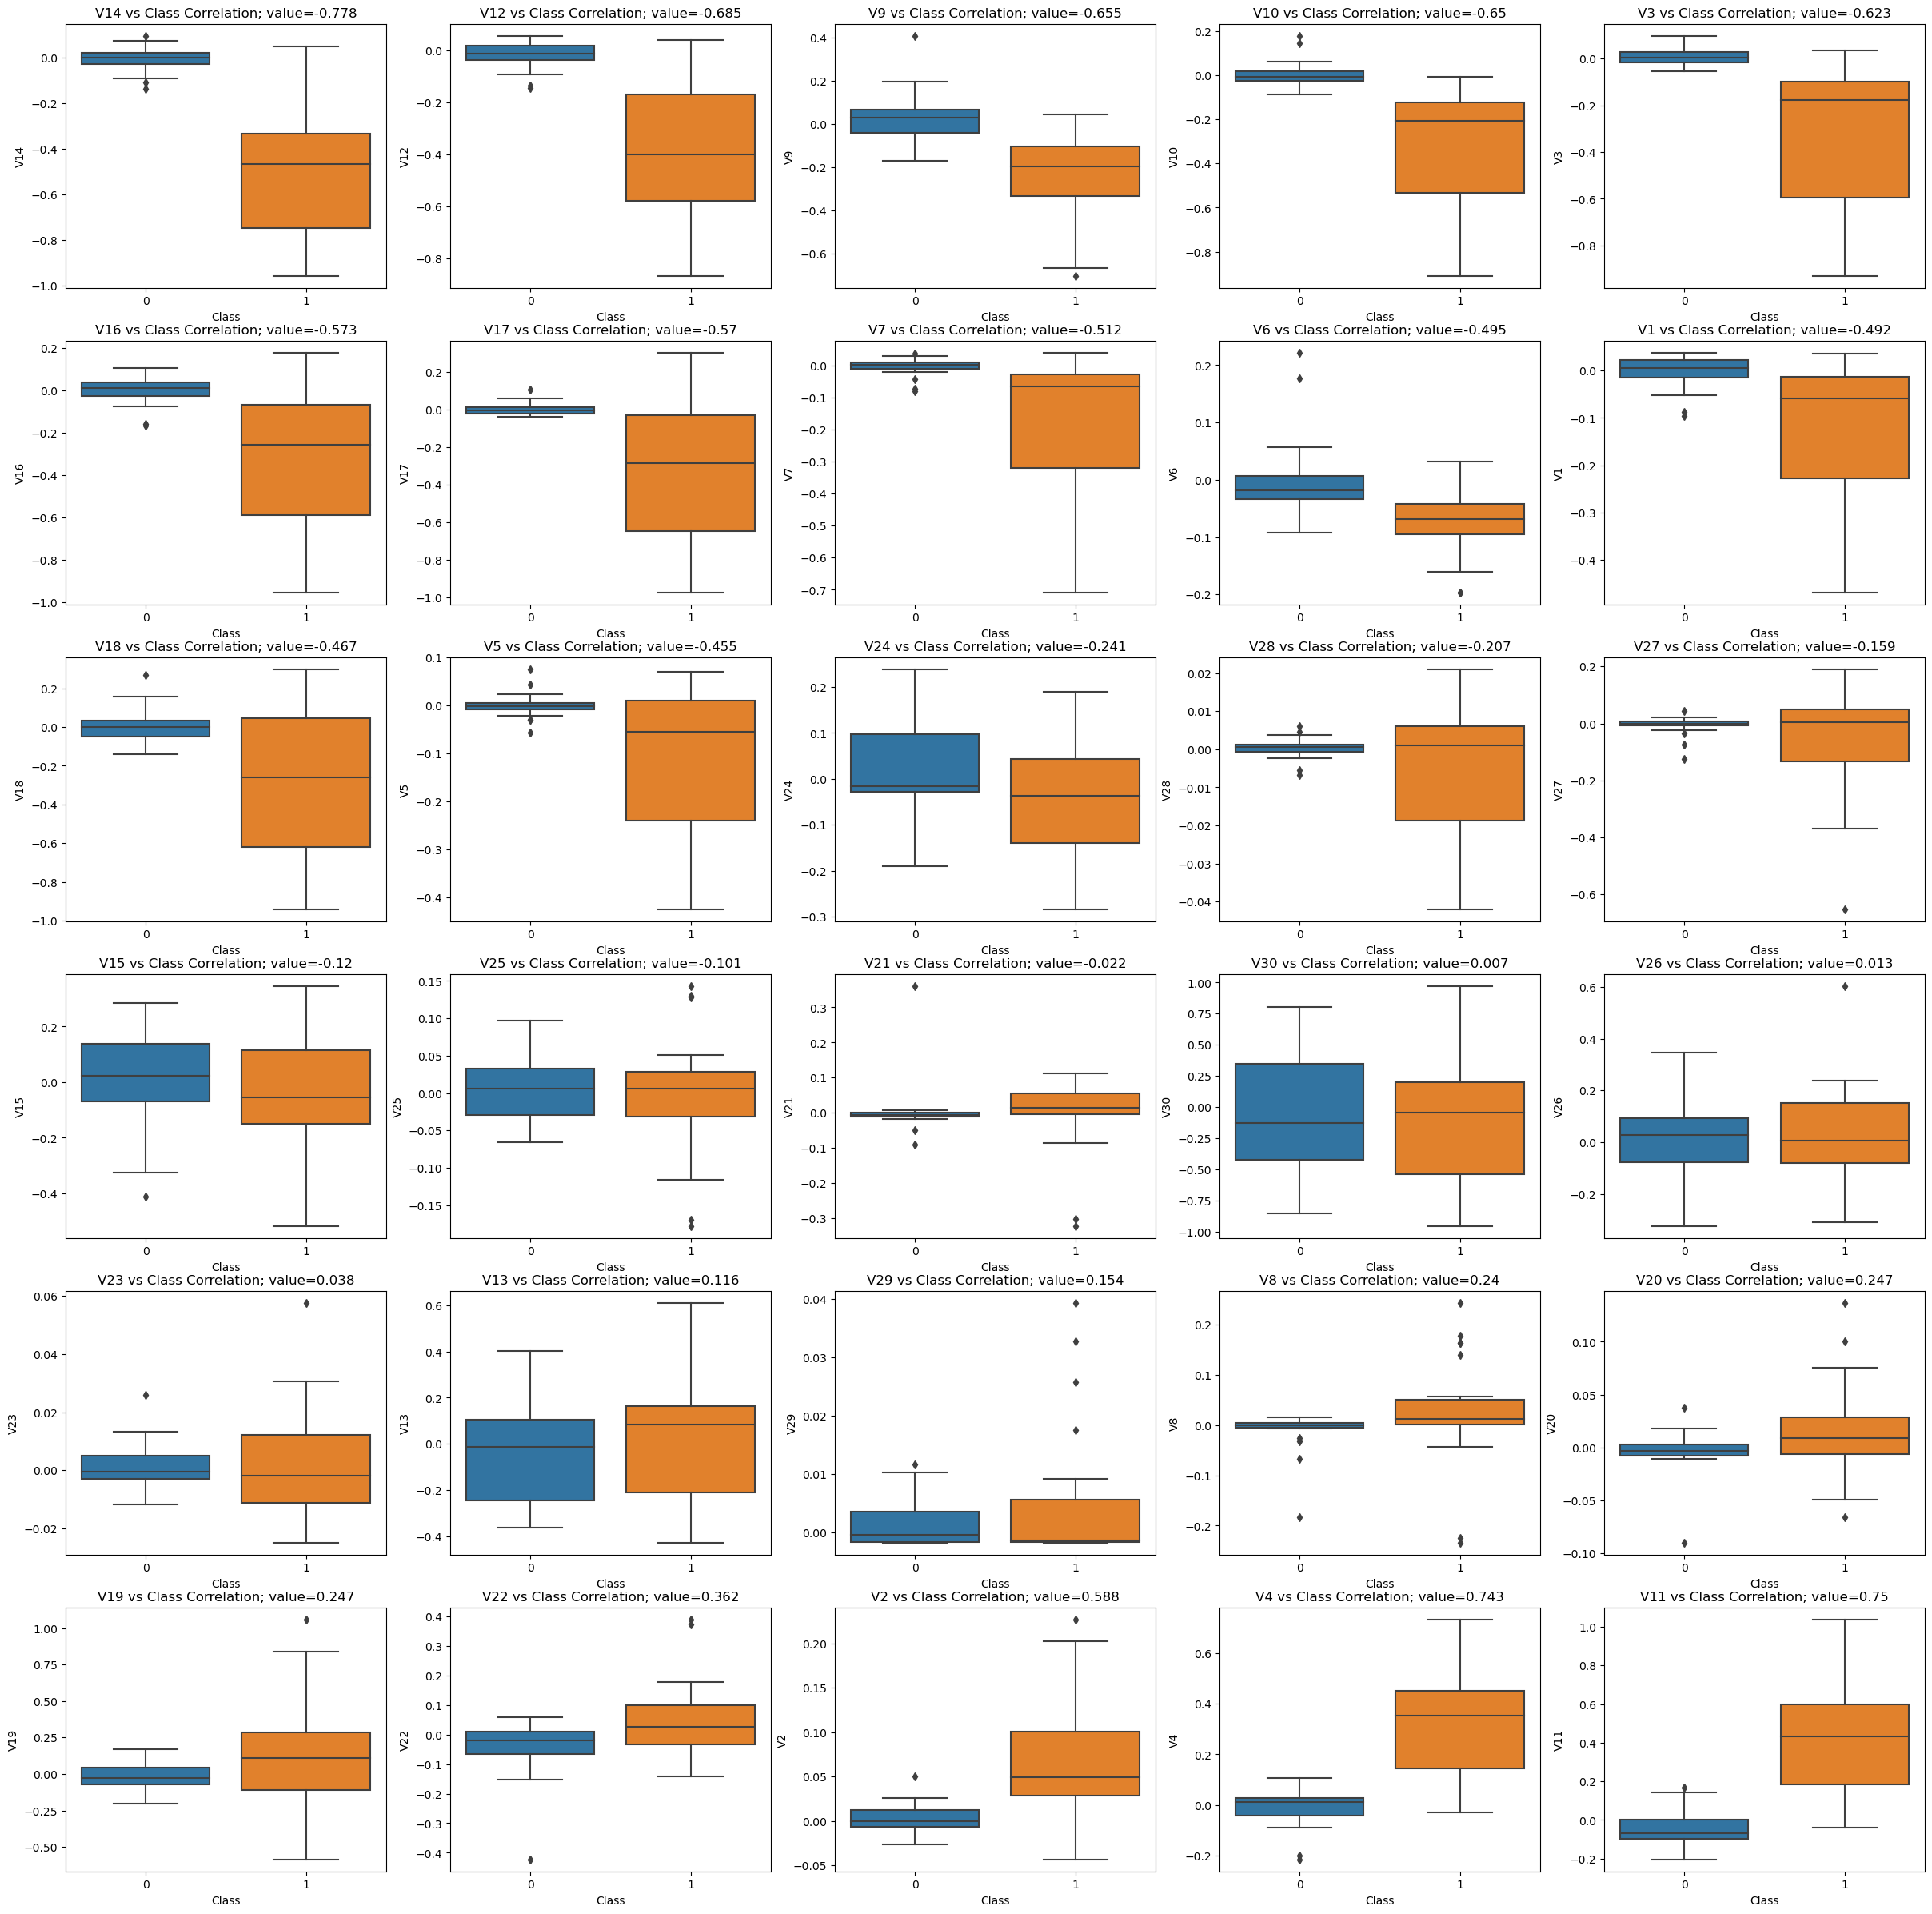

In [89]:
f, axes = plt.subplots(6, 5, figsize=(30,30))

for idx, (k,v) in enumerate(corr.sort_values().items()):
    i, j = divmod(idx, 5)
    sns.boxplot(x="Class", y=k, data=sample_df, ax=axes[i, j])
    axes[i,j].set_title(f'{k} vs Class Correlation; value={round(v,3)}')

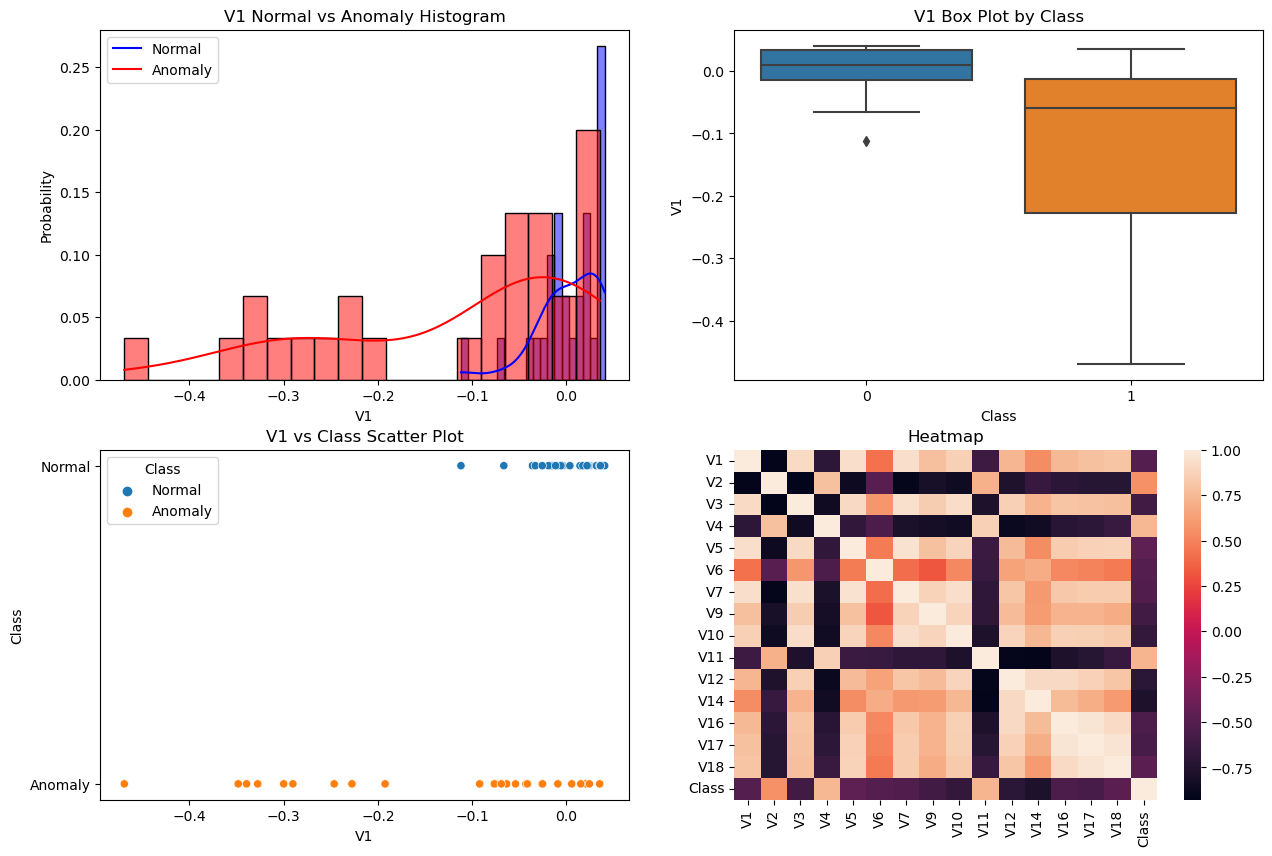

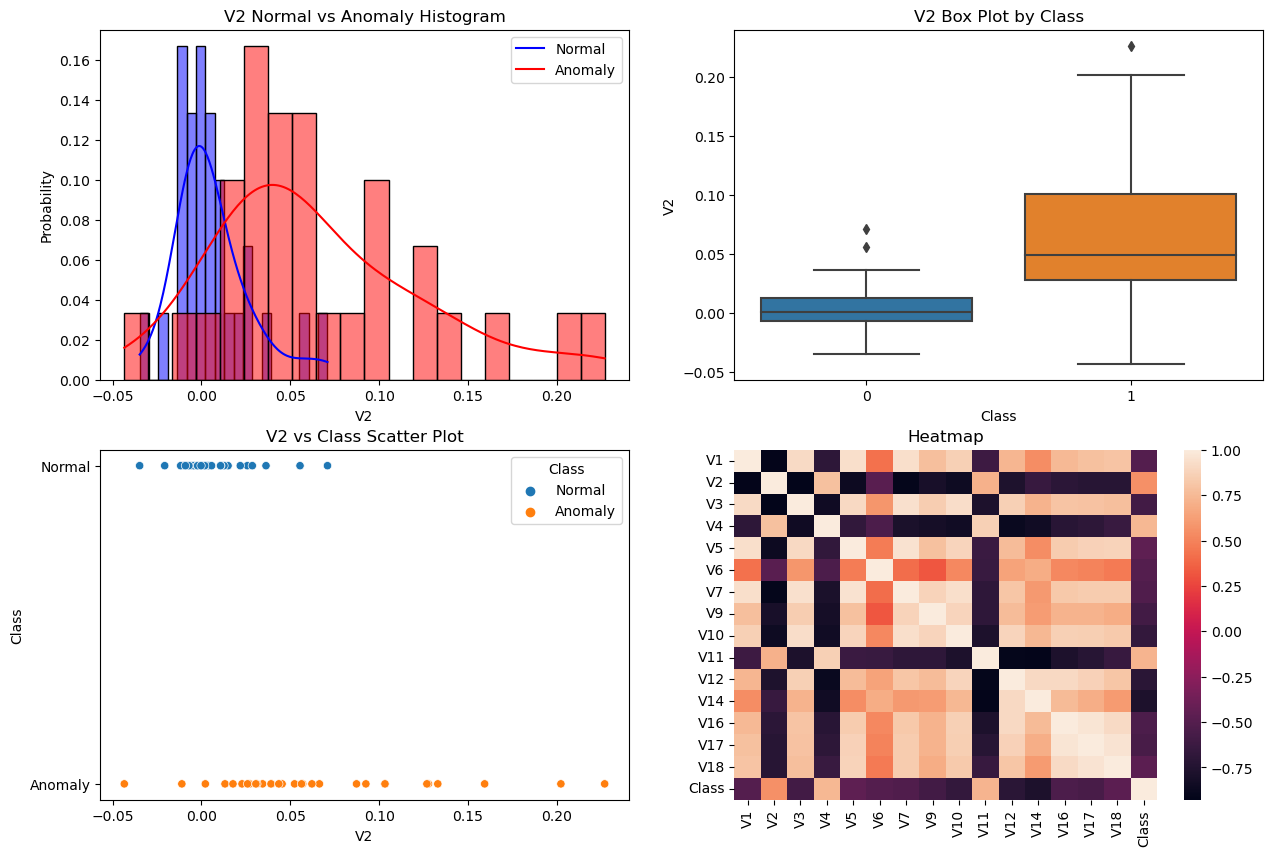

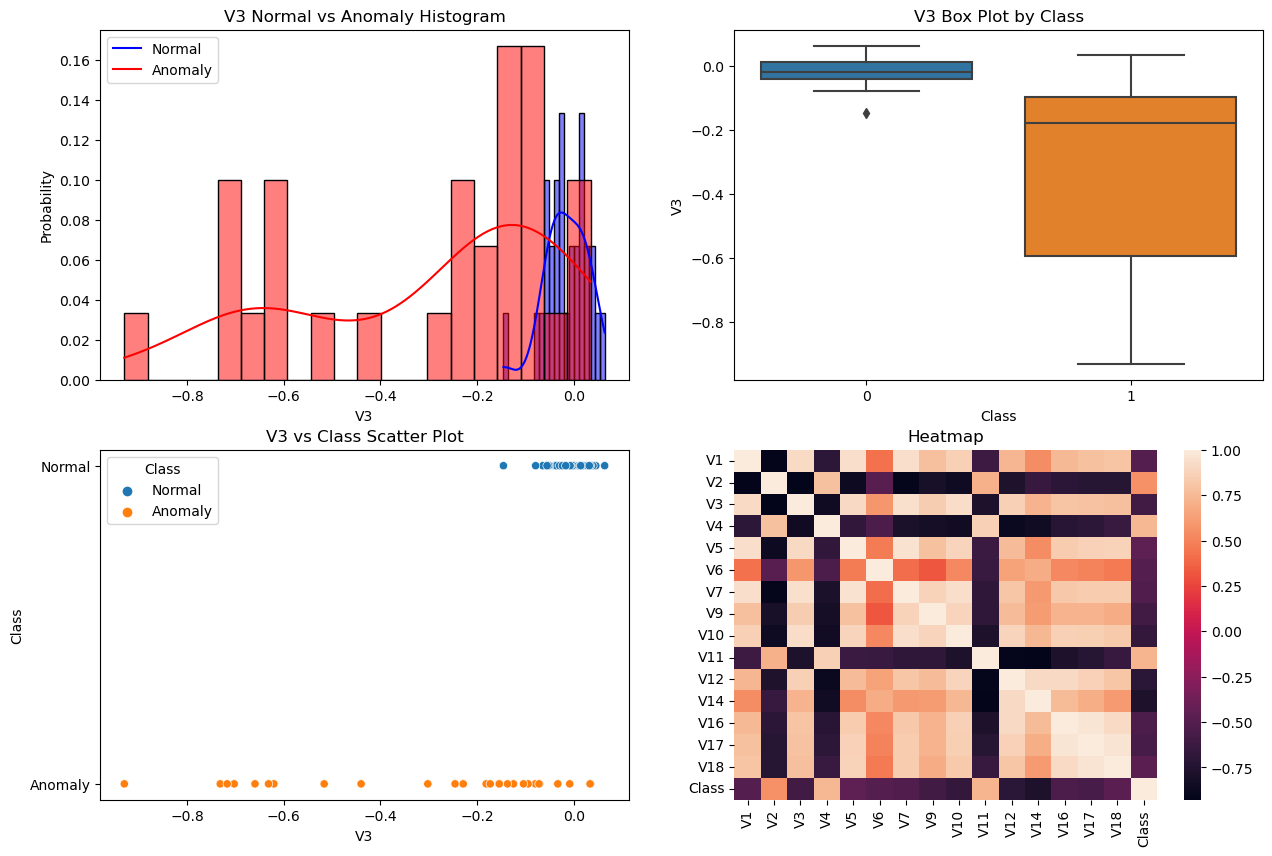

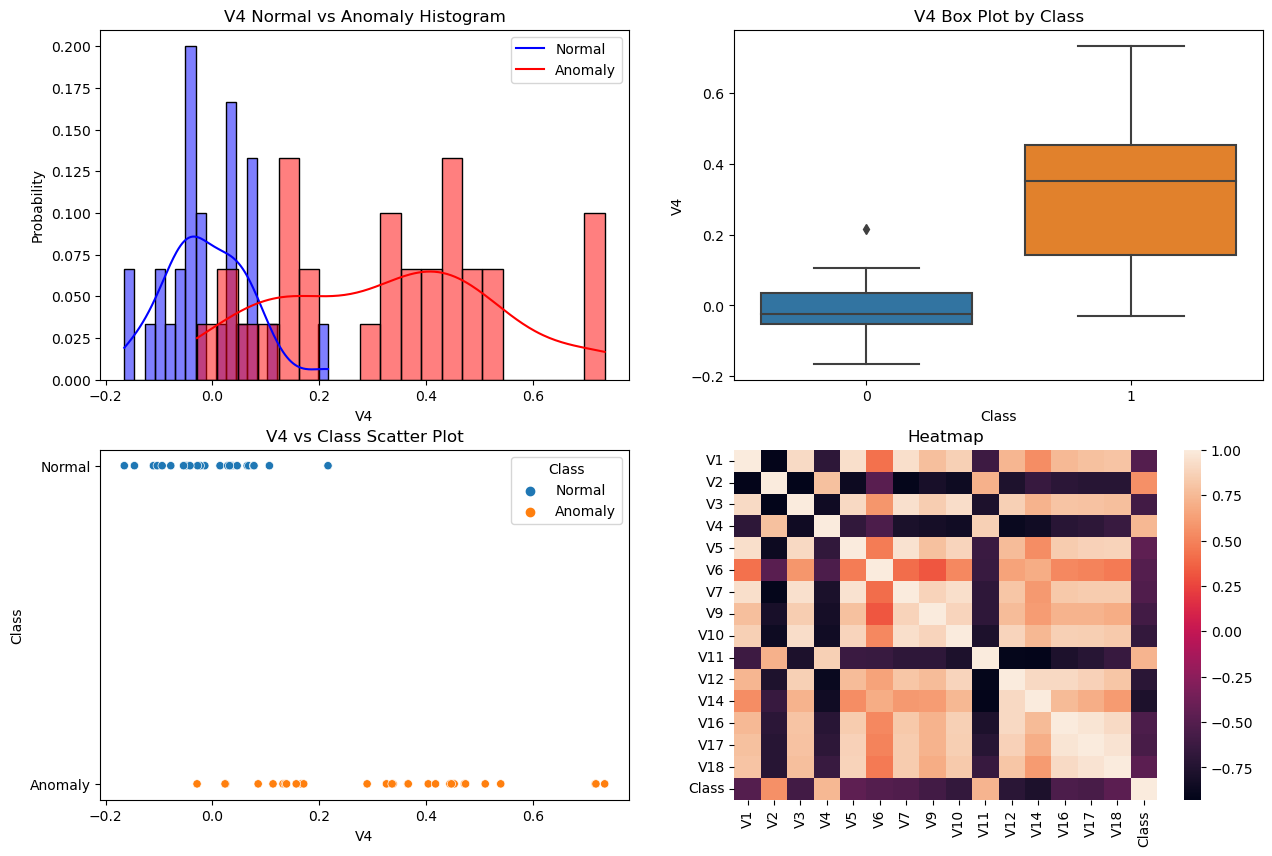

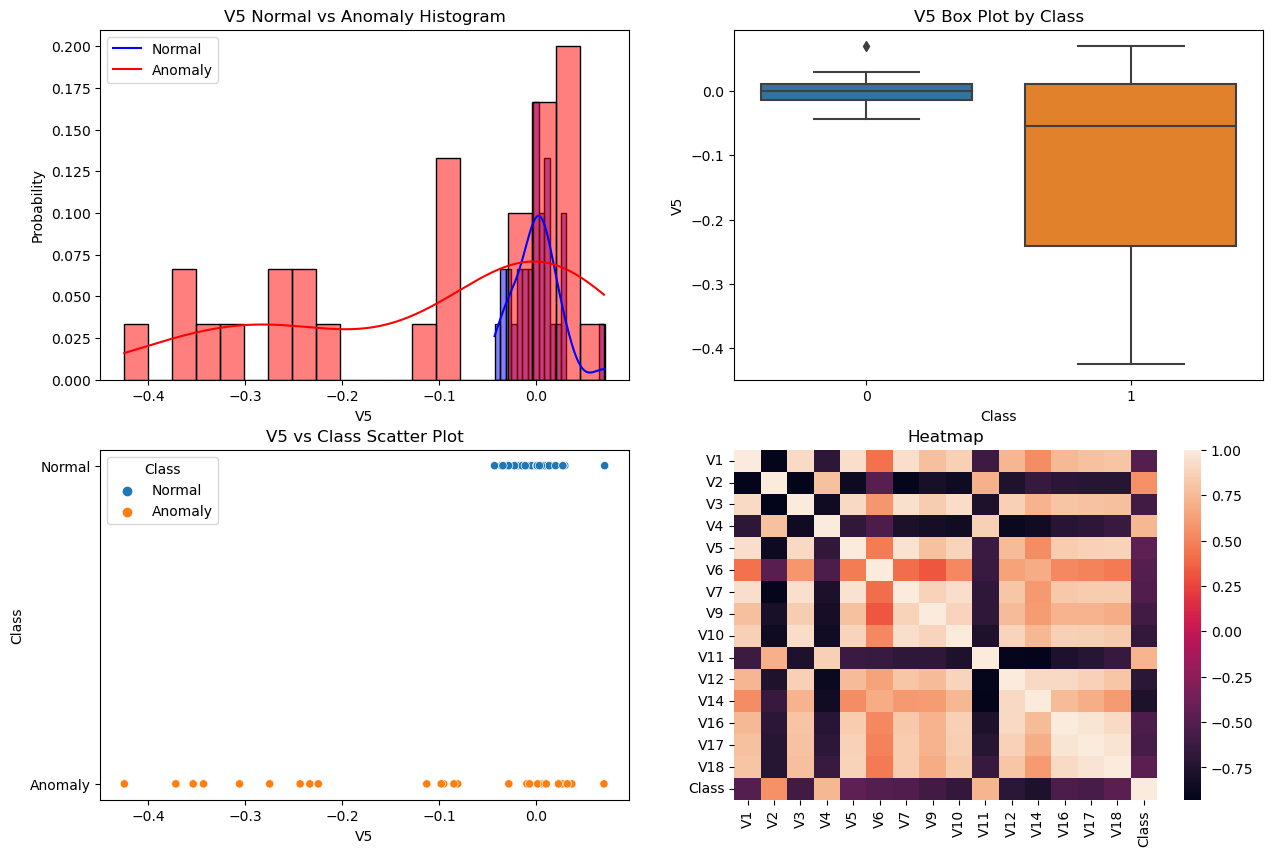

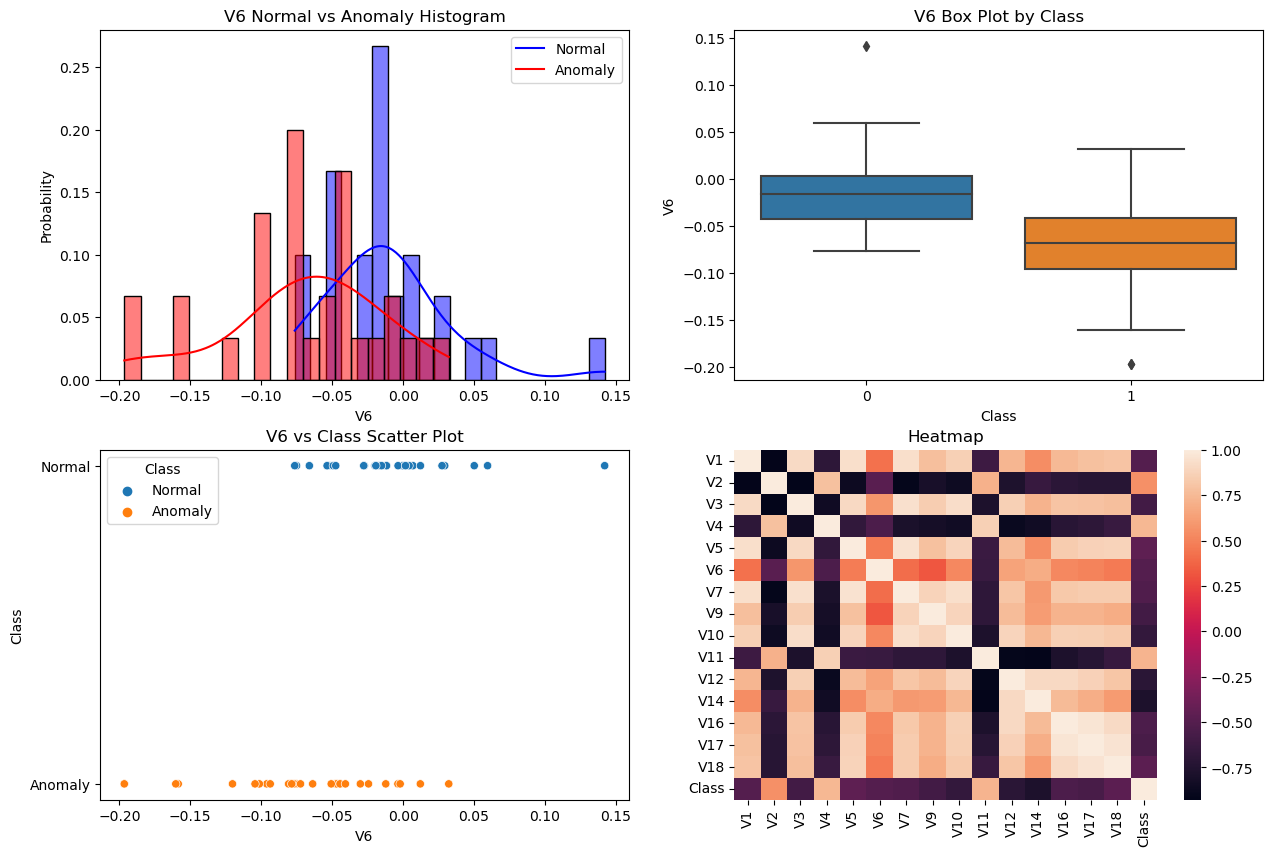

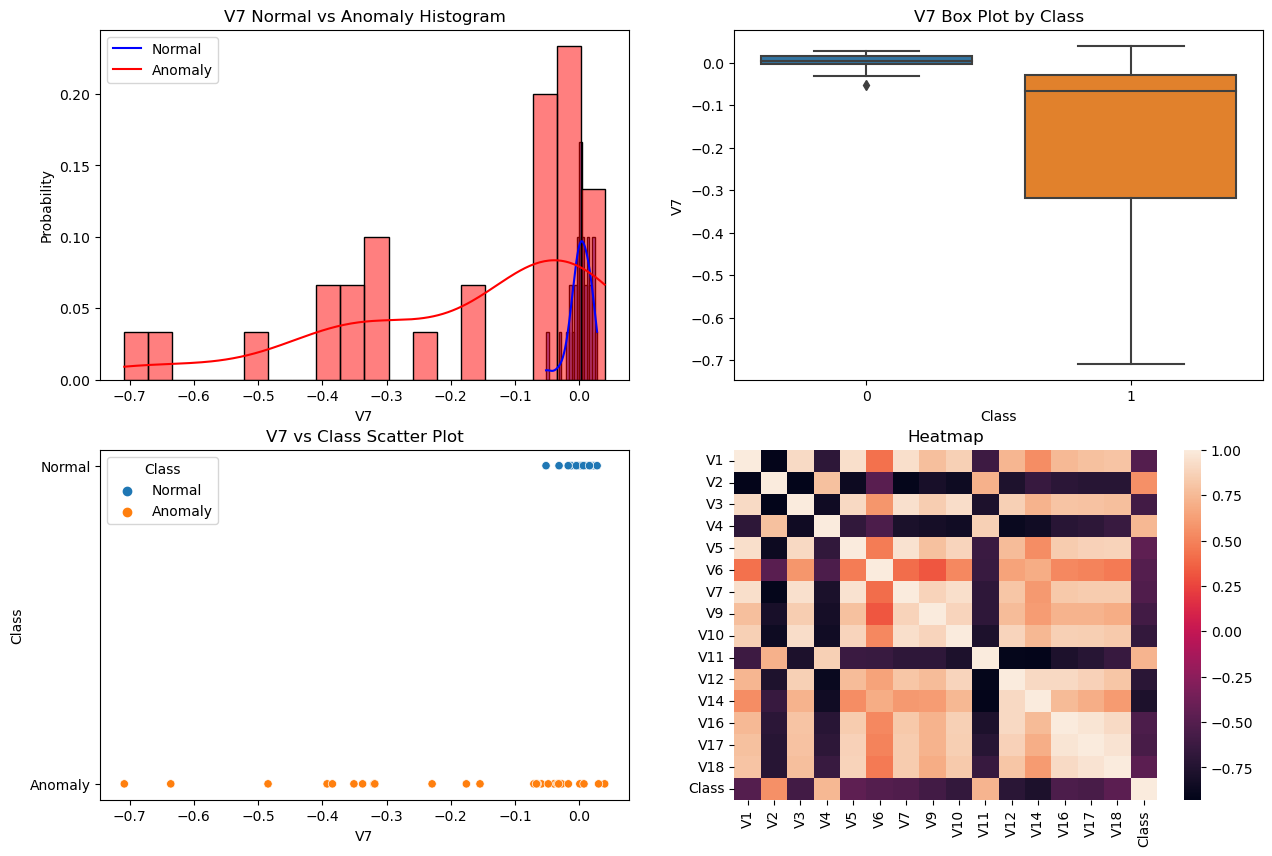

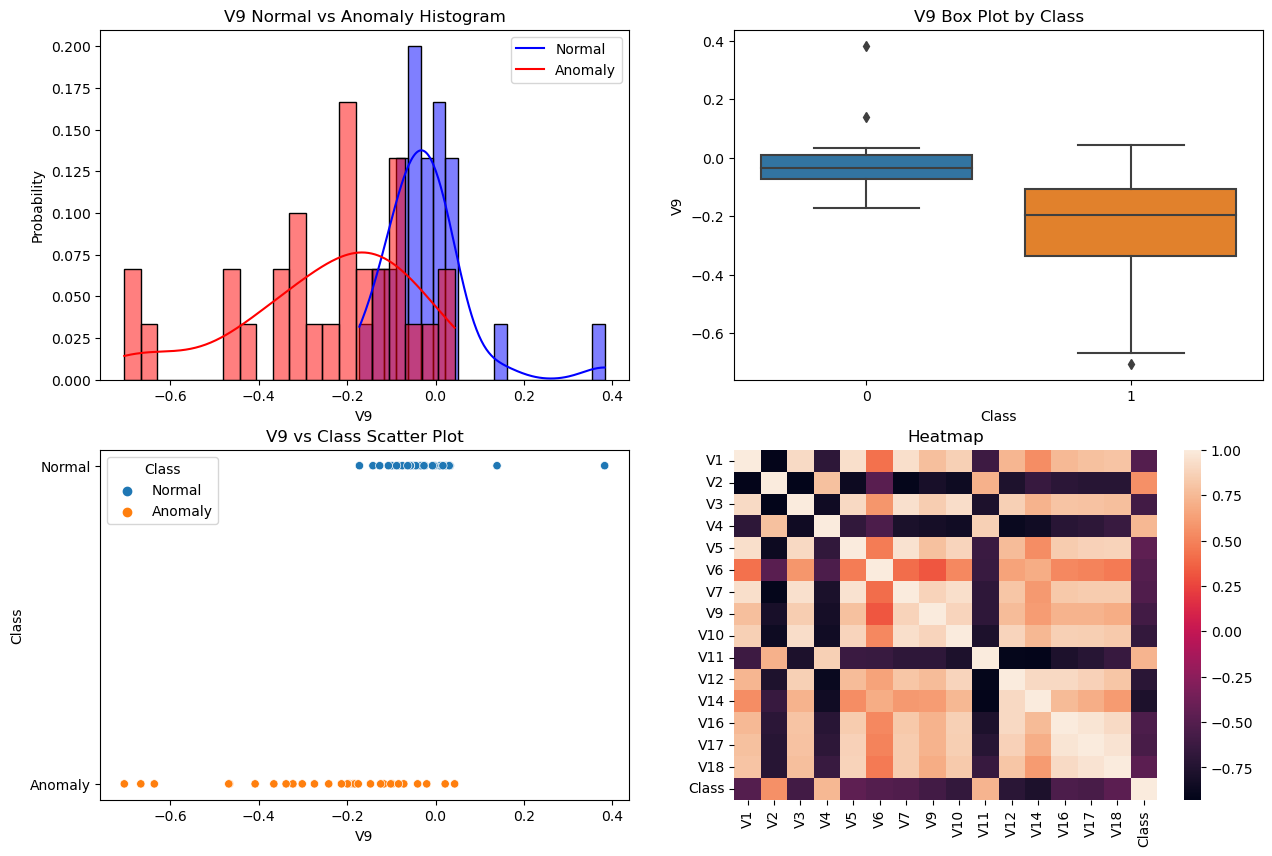

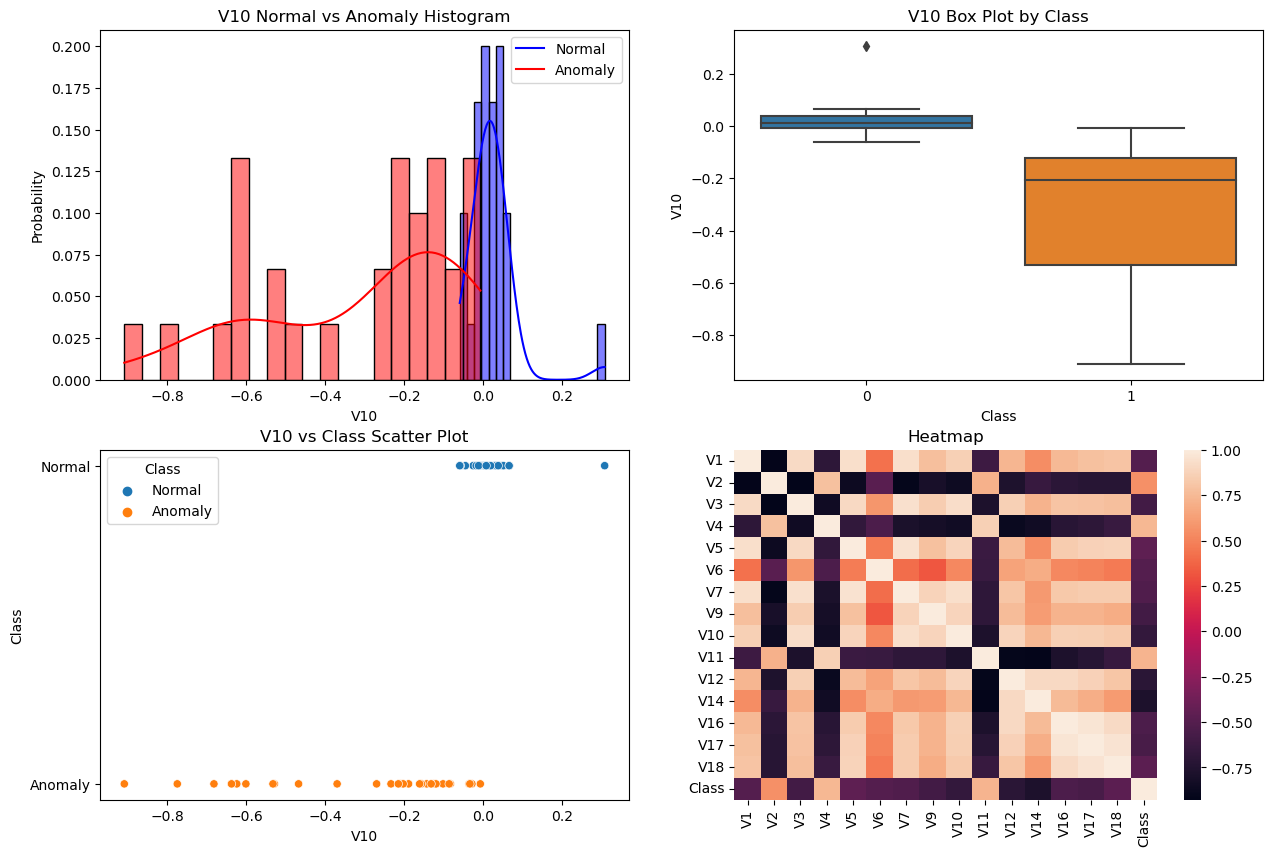

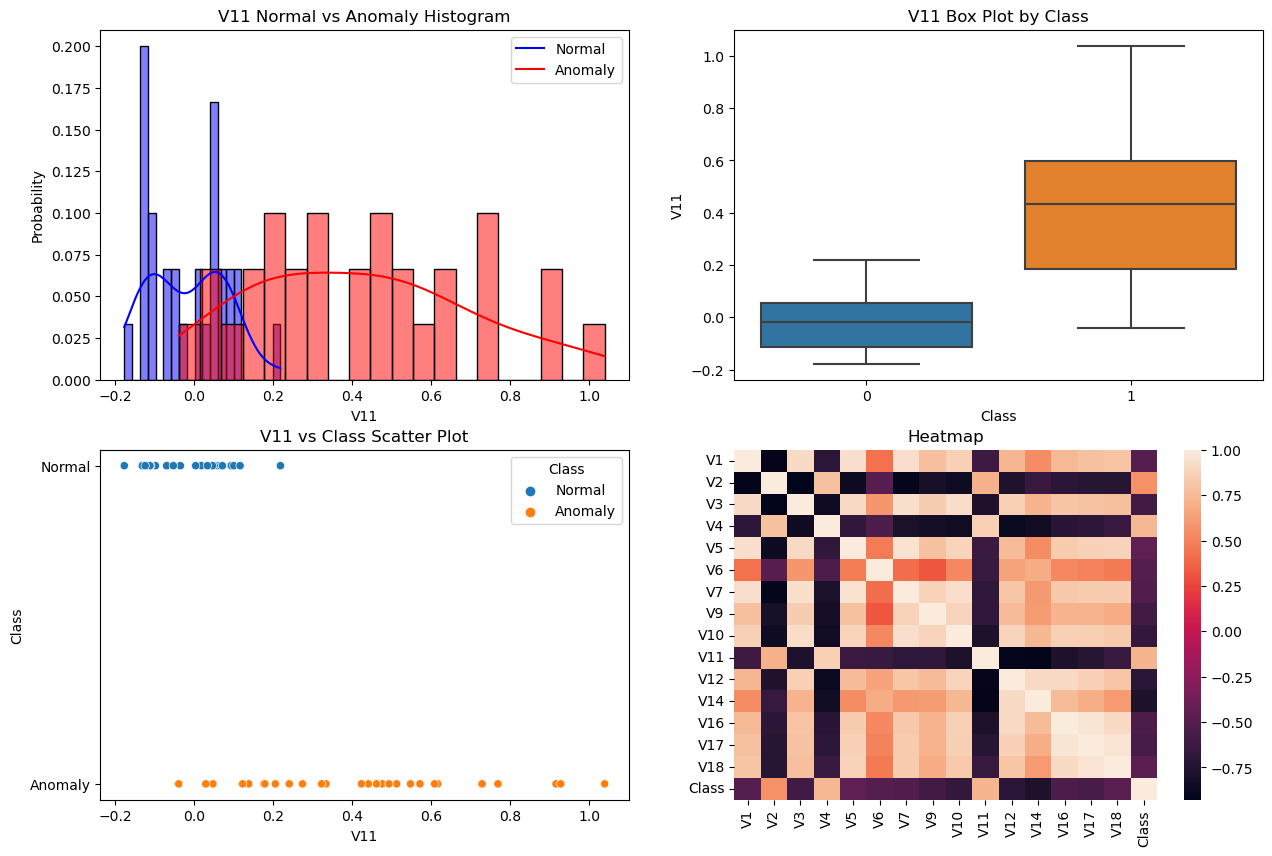

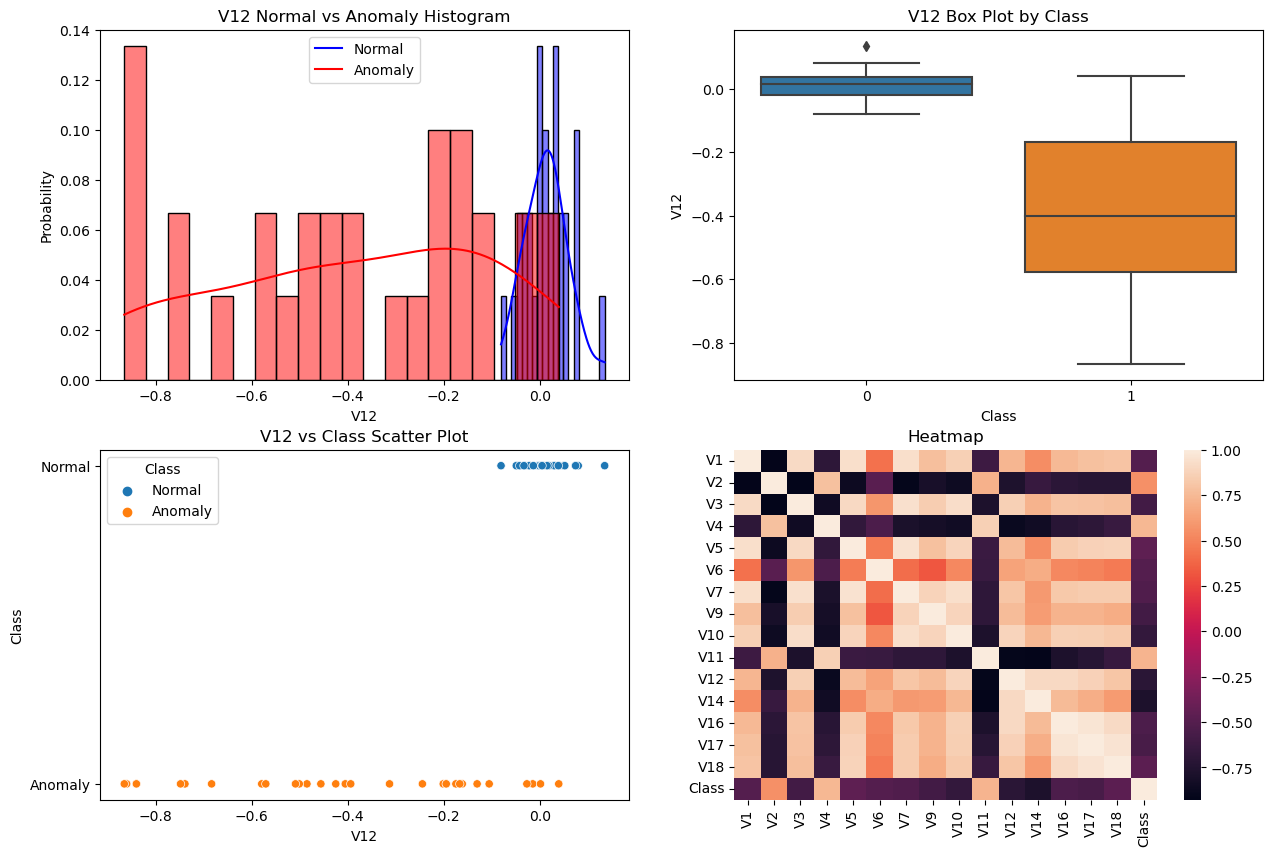

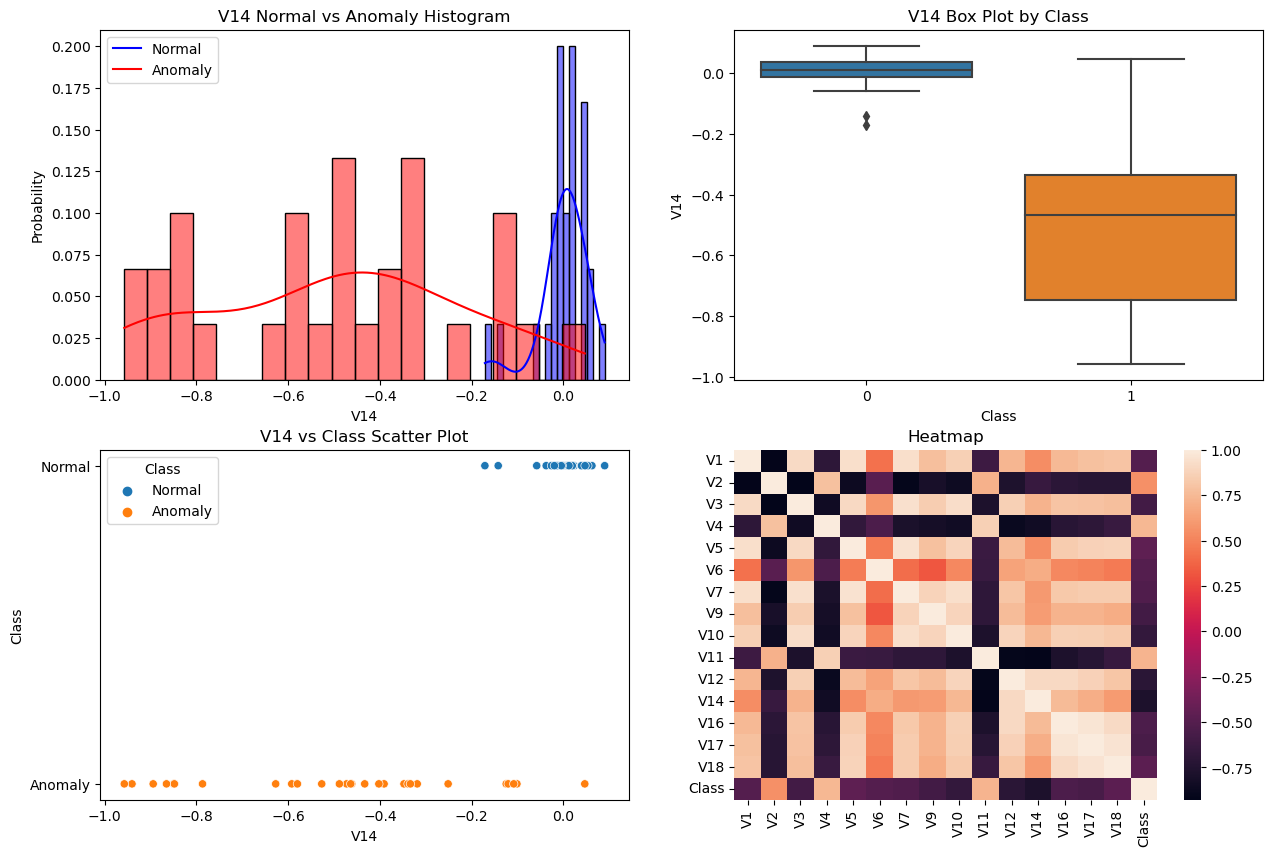

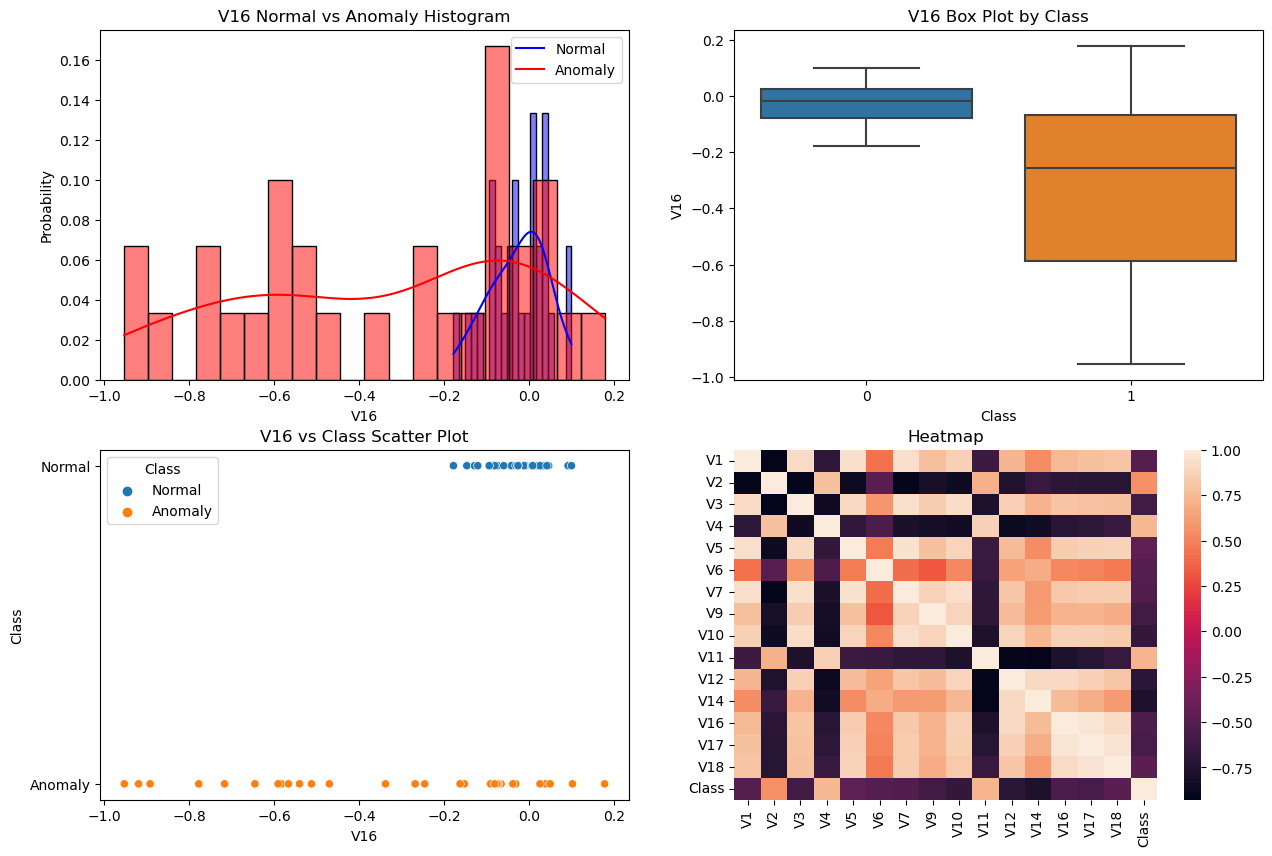

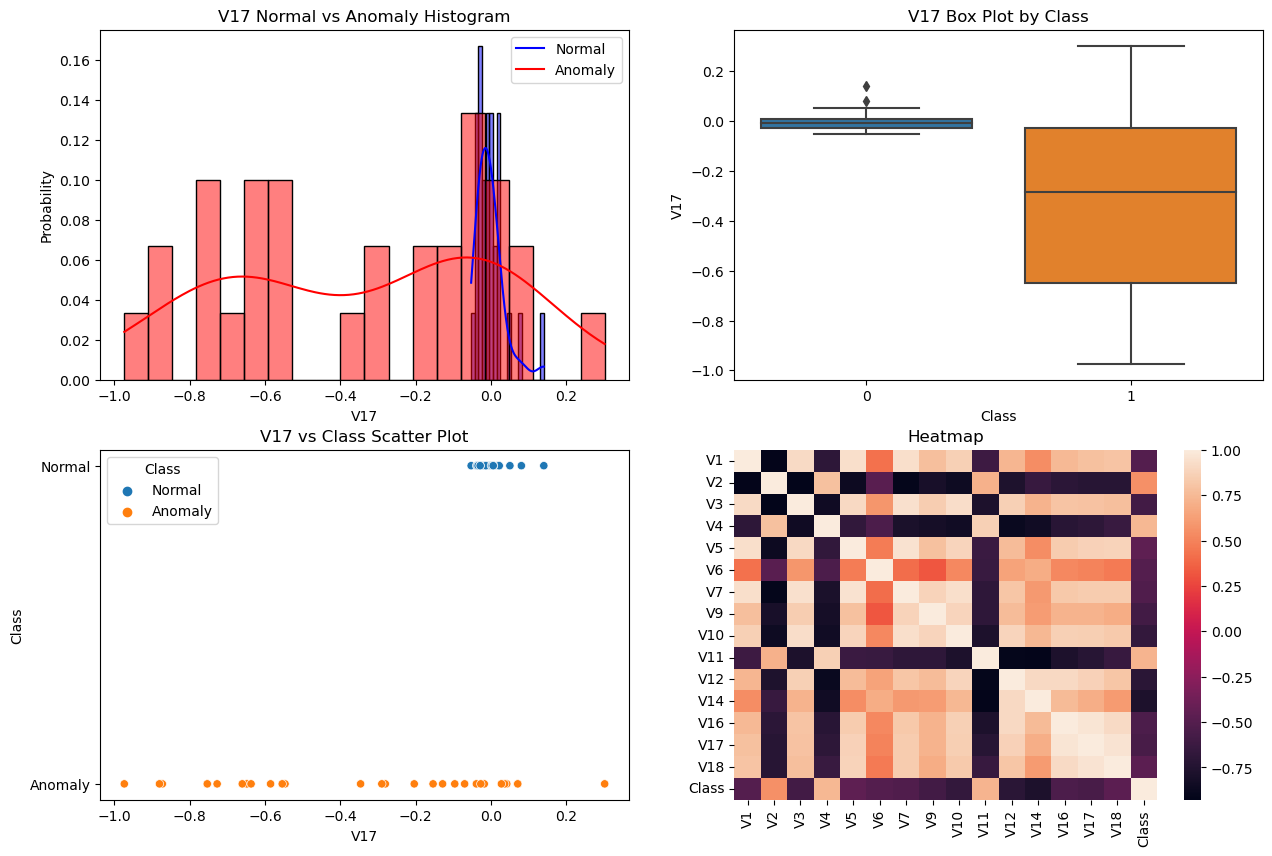

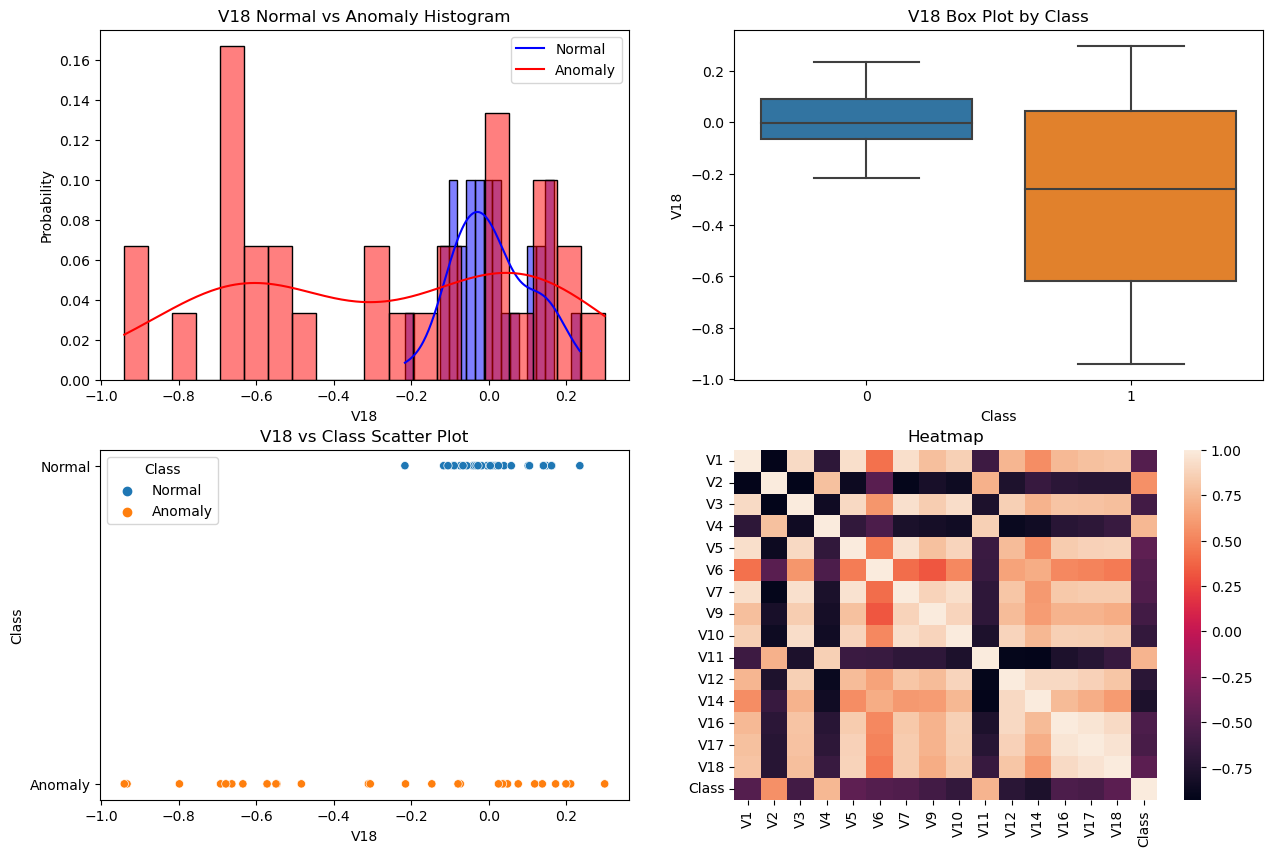

In [20]:
for index, col in enumerate(selected_feature):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    
    sns.histplot(sample_df.loc[sample_df['Class']==0, col], bins=20, color='b', stat='probability', label='normal', kde=True, ax=ax[0,0])
    sns.histplot(sample_df.loc[sample_df['Class']==1, col], bins=20, color='r', stat='probability', label='anomaly', kde=True, ax=ax[0,0])
    ax[0,0].set_title(f'{col} Normal vs Anomaly Histogram')
    ax[0,0].legend(('Normal', 'Anomaly'))
    
    sns.boxplot(data=sample_df, x='Class', y=col, ax=ax[0,1])
    ax[0,1].set_title(f'{col} Box Plot by Class')
    
    sns.scatterplot(data=sample_df_copy, x=sample_df_copy[col], y=sample_df_copy[label_col], hue='Class', ax=ax[1,0])
    ax[1,0].set_title(f'{col} vs Class Scatter Plot')
        
    sns.heatmap(sample_df[selected_feature+['Class']].corr(), ax=ax[1,1])
    ax[1,1].set_title('Heatmap')
    
    plt.show()